<a href="https://colab.research.google.com/github/losvaldote/Python_Club_for_Physicist/blob/main/Ejercicio_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ejercicio 2 v2**
# **Luis Osvaldo Téllez Tovar**

## a) Estudiar el error en dos métodos diferentes.

In [ ]:
# Vamos a importar las bibliotecas necesarias.
import numpy as np
import matplotlib.pyplot as plt


Como primer paso, definamos las funciones.
\begin{eqnarray}
    f_1(x) &=& \sin\left(x^2\right)\\
    f_2(x) &=& e^{\left(\sin (x)\right)}\\
    f_3(x) &=& \frac{0.2}{\left(x -3.2\right)^2 + 0.04}
\end{eqnarray}

In [ ]:
def f_1(x):
  return(np.sin(x**2))

def f_2(x):
  return(np.exp(np.sin(x)))

def f_3(x):
  return(0.2/((x-3.2)**2 + 0.04))

Generemos los dominios para las funciones, es decir, dividiremos el intervalo $[0.0, 5.0]$ en 10, 20 y 50 pasos y los guardaremos en arreglos.

In [ ]:
x_10 = np.linspace(0.0,5.0,10)
x_20 = np.linspace(0.0,5.0,20)
x_50 = np.linspace(0.0,5.0,50)

# Arreglo auxiliar para hacer las graficas.
x_100 = np.linspace(0.0,5.0,100)

Generemos las imágenes de las funciones, es decir, evaluemos las funciones $f_1, f_2$ y $f_3$ en los dominios que acabamos de generar.

In [ ]:
# Para la funcion f_1
y_1_10 = f_1(x_10)
y_1_20 = f_1(x_20)
y_1_50 = f_1(x_50)

# Para la funcion f_2
y_2_10 = f_2(x_10)
y_2_20 = f_2(x_20)
y_2_50 = f_2(x_50)

# Para la funcion f_3
y_3_10 = f_3(x_10)
y_3_20 = f_3(x_20)
y_3_50 = f_3(x_50)

Ahora que ya tenemos los puntos, hagamos la interpolación. Usaremos los métodos de Lagrange y Newton.

## **Lagrange.**

Usaremos la función **lagrange** incluida en la biblioteca scipy.

In [ ]:
from scipy.interpolate import lagrange

In [ ]:
# Interpolacion para la funcion 1

l_1_10 = lagrange(x_10, y_1_10)
l_1_20 = lagrange(x_20, y_1_20)
l_1_50 = lagrange(x_50, y_1_50)

# Interpolacion para la funcion 2

l_2_10 = lagrange(x_10, y_2_10)
l_2_20 = lagrange(x_20, y_2_20)
l_2_50 = lagrange(x_50, y_2_50)

# Interpolacion para la funcion 3

l_3_10 = lagrange(x_10, y_3_10)
l_3_20 = lagrange(x_20, y_3_20)
l_3_50 = lagrange(x_50, y_3_50)

## **Newton.**

Definamos los algoritmos necesarios para hacer la interpolación de **Newton**.

In [ ]:
def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)               #cantidad de datos
    coef = np.zeros([n, n])  #matriz de coeficientes nula

    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):     #dos ciclos para llenar la matriz
        for i in range(n-j):
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i]) #diferencias finitas
            
    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial 
    at x
    '''
    n = len(x_data) - 1 
    p = coef[n]

    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

In [ ]:
# Interpolacion para la funcion 1

# 10 puntos
# get the divided difference coef
a_s_1_10 = divided_diff(x_10, y_1_10)[0, :]
# evaluate on new data points
n_1_10 = newton_poly(a_s_1_10, x_10, x_100)

# 20 puntos
# get the divided difference coef
a_s_1_20 = divided_diff(x_20, y_1_20)[0, :]
# evaluate on new data points
n_1_20 = newton_poly(a_s_1_20, x_20, x_100)

# 50 puntos
# get the divided difference coef
a_s_1_50 = divided_diff(x_50, y_1_50)[0, :]
# evaluate on new data points
n_1_50 = newton_poly(a_s_1_50, x_50, x_100)

# Interpolacion para la funcion 2

# 10 puntos
# get the divided difference coef
a_s_2_10 = divided_diff(x_10, y_2_10)[0, :]
# evaluate on new data points
n_2_10 = newton_poly(a_s_2_10, x_10, x_100)

# 20 puntos
# get the divided difference coef
a_s_2_20 = divided_diff(x_20, y_2_20)[0, :]
# evaluate on new data points
n_2_20 = newton_poly(a_s_2_20, x_20, x_100)

# 50 puntos
# get the divided difference coef
a_s_2_50 = divided_diff(x_50, y_2_50)[0, :]
# evaluate on new data points
n_2_50 = newton_poly(a_s_2_50, x_50, x_100)

# Interpolacion para la funcion 3

# 10 puntos
# get the divided difference coef
a_s_3_10 = divided_diff(x_10, y_3_10)[0, :]
# evaluate on new data points
n_3_10 = newton_poly(a_s_3_10, x_10, x_100)

# 20 puntos
# get the divided difference coef
a_s_3_20 = divided_diff(x_20, y_3_20)[0, :]
# evaluate on new data points
n_3_20 = newton_poly(a_s_3_20, x_20, x_100)

# 50 puntos
# get the divided difference coef
a_s_3_50 = divided_diff(x_50, y_3_50)[0, :]
# evaluate on new data points
n_3_50 = newton_poly(a_s_3_50, x_50, x_100)

Hagamos las gráficas para comparar los resultados.

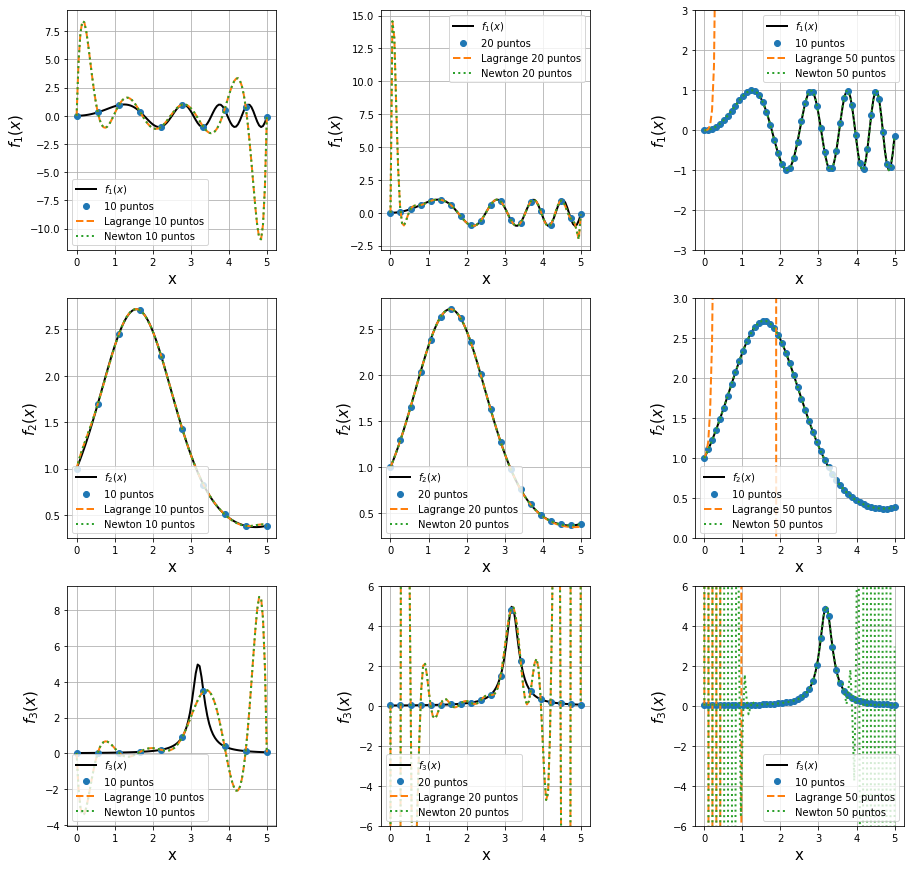

In [ ]:
# Hagamos la grafica.
fig, axs = plt.subplots(3,3,figsize = (15,15))
fig.subplots_adjust(wspace=0.5)

axs[0,0].plot(x_100, f_1(x_100), color = 'k', linewidth=2, label='$f_1(x)$') # Funcion original.
axs[0,0].plot(x_10, y_1_10, 'o',label='10 puntos') # 10 puntos
axs[0,0].plot(x_100, l_1_10(x_100), linewidth=2, linestyle = 'dashed', label='Lagrange 10 puntos') # Interpolacion con 10 puntos.
axs[0,0].plot(x_100, n_1_10, linewidth=2, linestyle = 'dotted', label='Newton 10 puntos') # Interpolacion con 10 puntos.
axs[0,0].set_xlabel('x', fontsize=15)
axs[0,0].set_ylabel('$f_1(x)$',fontsize=15)
axs[0,0].legend(loc = 'lower left')
axs[0,0].grid()

axs[0,1].plot(x_100, f_1(x_100), color = 'k', linewidth=2, label='$f_1(x)$') # Funcion original.
axs[0,1].plot(x_20, y_1_20, 'o',label='20 puntos') # 20 puntos
axs[0,1].plot(x_100, l_1_20(x_100), linewidth=2, linestyle = 'dashed', label='Lagrange 20 puntos') # Interpolacion con 20 puntos.
axs[0,1].plot(x_100, n_1_20, linewidth=2, linestyle = 'dotted', label='Newton 20 puntos') # Interpolacion con 20 puntos.
axs[0,1].set_xlabel('x', fontsize=15)
axs[0,1].set_ylabel('$f_1(x)$',fontsize=15)
axs[0,1].legend(loc = 'best')
axs[0,1].grid()

axs[0,2].plot(x_100, f_1(x_100), color = 'k', linewidth=2, label='$f_1(x)$') # Funcion original.
axs[0,2].plot(x_50, y_1_50, 'o',label='10 puntos') # 10 puntos
axs[0,2].plot(x_100, l_1_50(x_100), linewidth=2, linestyle = 'dashed', label='Lagrange 50 puntos') # Interpolacion con 10 puntos.
axs[0,2].plot(x_100, n_1_50, linewidth=2, linestyle = 'dotted', label='Newton 50 puntos') # Interpolacion con 10 puntos.
axs[0,2].set_xlabel('x', fontsize=15)
axs[0,2].set_ylabel('$f_1(x)$',fontsize=15)
axs[0,2].legend(loc = 'best')
axs[0,2].set_ylim(-3.0,3.0)
axs[0,2].grid()

axs[1,0].plot(x_100, f_2(x_100), color = 'k', linewidth=2, label='$f_2(x)$') # Funcion original.
axs[1,0].plot(x_10, y_2_10, 'o',label='10 puntos') # 10 puntos
axs[1,0].plot(x_100, l_2_10(x_100), linewidth=2, linestyle = 'dashed', label='Lagrange 10 puntos') # Interpolacion con 10 puntos.
axs[1,0].plot(x_100, n_2_10, linewidth=2, linestyle = 'dotted', label='Newton 10 puntos') # Interpolacion con 10 puntos.
axs[1,0].set_xlabel('x', fontsize=15)
axs[1,0].set_ylabel('$f_2(x)$',fontsize=15)
axs[1,0].legend(loc = 'lower left')
axs[1,0].grid()

axs[1,1].plot(x_100, f_2(x_100), color = 'k', linewidth=2, label='$f_2(x)$') # Funcion original.
axs[1,1].plot(x_20, y_2_20, 'o',label='20 puntos') # 20 puntos
axs[1,1].plot(x_100, l_2_20(x_100), linewidth=2, linestyle = 'dashed', label='Lagrange 20 puntos') # Interpolacion con 20 puntos.
axs[1,1].plot(x_100, n_2_20, linewidth=2, linestyle = 'dotted', label='Newton 20 puntos') # Interpolacion con 20 puntos.
axs[1,1].set_xlabel('x', fontsize=15)
axs[1,1].set_ylabel('$f_2(x)$',fontsize=15)
axs[1,1].legend(loc = 'best')
axs[1,1].grid()

axs[1,2].plot(x_100, f_2(x_100), color = 'k', linewidth=2, label='$f_2(x)$') # Funcion original.
axs[1,2].plot(x_50, y_2_50, 'o',label='10 puntos') # 10 puntos
axs[1,2].plot(x_100, l_2_50(x_100), linewidth=2, linestyle = 'dashed', label='Lagrange 50 puntos') # Interpolacion con 10 puntos.
axs[1,2].plot(x_100, n_2_50, linewidth=2, linestyle = 'dotted', label='Newton 50 puntos') # Interpolacion con 10 puntos.
axs[1,2].set_xlabel('x', fontsize=15)
axs[1,2].set_ylabel('$f_2(x)$',fontsize=15)
axs[1,2].legend(loc = 'best')
axs[1,2].set_ylim(0.0,3.0)
axs[1,2].grid()

axs[2,0].plot(x_100, f_3(x_100), color = 'k', linewidth=2, label='$f_3(x)$') # Funcion original.
axs[2,0].plot(x_10, y_3_10, 'o',label='10 puntos') # 10 puntos
axs[2,0].plot(x_100, l_3_10(x_100), linewidth=2, linestyle = 'dashed', label='Lagrange 10 puntos') # Interpolacion con 10 puntos.
axs[2,0].plot(x_100, n_3_10, linewidth=2, linestyle = 'dotted', label='Newton 10 puntos') # Interpolacion con 10 puntos.
axs[2,0].set_xlabel('x', fontsize=15)
axs[2,0].set_ylabel('$f_3(x)$',fontsize=15)
axs[2,0].legend(loc = 'lower left')
axs[2,0].grid()

axs[2,1].plot(x_100, f_3(x_100), color = 'k', linewidth=2, label='$f_3(x)$') # Funcion original.
axs[2,1].plot(x_20, y_3_20, 'o',label='20 puntos') # 20 puntos
axs[2,1].plot(x_100, l_3_20(x_100), linewidth=2, linestyle = 'dashed', label='Lagrange 20 puntos') # Interpolacion con 20 puntos.
axs[2,1].plot(x_100, n_3_20, linewidth=2, linestyle = 'dotted', label='Newton 20 puntos') # Interpolacion con 20 puntos.
axs[2,1].set_xlabel('x', fontsize=15)
axs[2,1].set_ylabel('$f_3(x)$',fontsize=15)
axs[2,1].legend(loc = 'best')
axs[2,1].set_ylim(-6.0,6.0)
axs[2,1].grid()

axs[2,2].plot(x_100, f_3(x_100), color = 'k', linewidth=2, label='$f_3(x)$') # Funcion original.
axs[2,2].plot(x_50, y_3_50, 'o',label='10 puntos') # 10 puntos
axs[2,2].plot(x_100, l_3_50(x_100), linewidth=2, linestyle = 'dashed', label='Lagrange 50 puntos') # Interpolacion con 10 puntos.
axs[2,2].plot(x_100, n_3_50, linewidth=2, linestyle = 'dotted', label='Newton 50 puntos') # Interpolacion con 10 puntos.
axs[2,2].set_xlabel('x', fontsize=15)
axs[2,2].set_ylabel('$f_3(x)$',fontsize=15)
axs[2,2].legend(loc = 'best')
axs[2,2].set_ylim(-6.0,6.0)
axs[2,2].grid()

plt.show()

Para el error usaremos 
$$Error = |funcion - interpolacion|$$

Donde, $funcion$ se refiere al valor obtenido de la función original e $interpolacion$ se refiere al valor obtenido del polinomio de interpolacion. 


In [ ]:
# Lagrange.

# f_1
e_1_10 = np.abs(f_1(x_100)-l_1_10(x_100))
e_1_20 = np.abs(f_1(x_100)-l_1_20(x_100))
e_1_50 = np.abs(f_1(x_100)-l_1_50(x_100))
#f_2
e_2_10 = np.abs(f_2(x_100)-l_2_10(x_100))
e_2_20 = np.abs(f_2(x_100)-l_2_20(x_100))
e_2_50 = np.abs(f_2(x_100)-l_2_50(x_100))
#f_3
e_3_10 = np.abs(f_3(x_100)-l_3_10(x_100))
e_3_20 = np.abs(f_3(x_100)-l_3_20(x_100))
e_3_50 = np.abs(f_3(x_100)-l_3_50(x_100))

# Newton.

# f_1
en_1_10 = np.abs(f_1(x_100)-n_1_10)
en_1_20 = np.abs(f_1(x_100)-n_1_20)
en_1_50 = np.abs(f_1(x_100)-n_1_50)
# f_2
en_2_10 = np.abs(f_2(x_100)-n_2_10)
en_2_20 = np.abs(f_2(x_100)-n_2_20)
en_2_50 = np.abs(f_2(x_100)-n_2_50)
# f_3
en_3_10 = np.abs(f_3(x_100)-n_3_10)
en_3_20 = np.abs(f_3(x_100)-n_3_20)
en_3_50 = np.abs(f_3(x_100)-n_3_50)

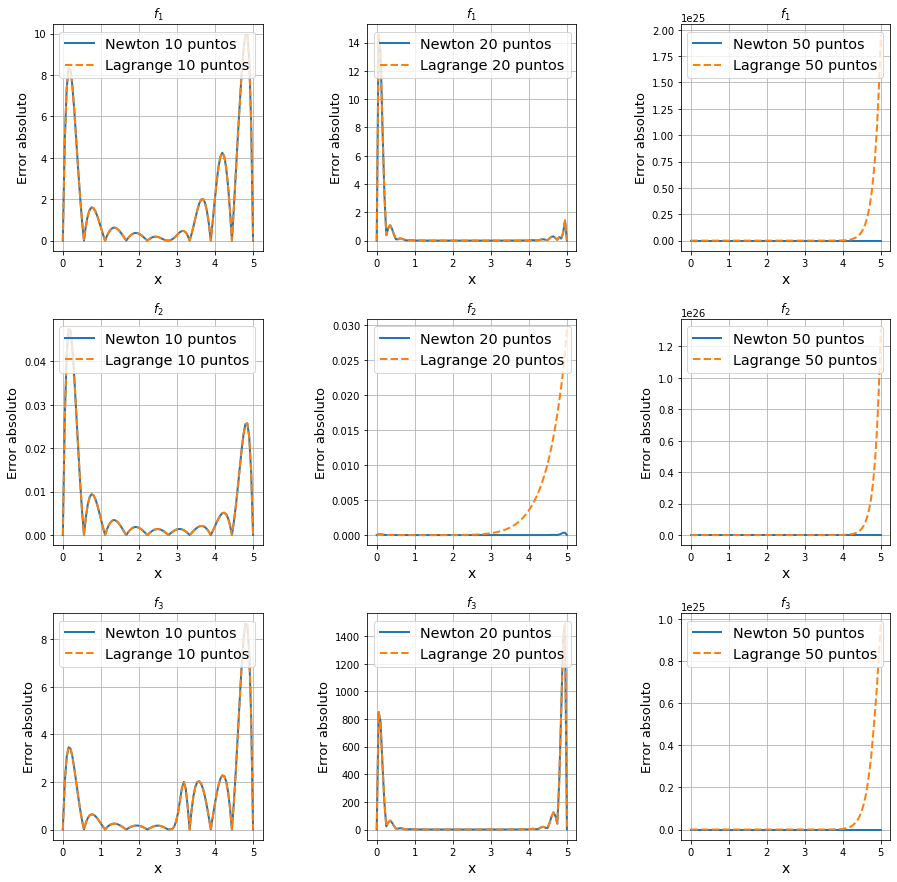

In [ ]:
# Hagamos la grafica.
fig, axs = plt.subplots(3,3,figsize = (15,15))
fig.subplots_adjust(wspace=0.5, hspace=0.3)

axs[0,0].plot(x_100, en_1_10, linewidth=2, label='Newton 10 puntos') # Interpolacion con 10 puntos.
axs[0,0].plot(x_100, e_1_10, linewidth=2, linestyle='dashed', label='Lagrange 10 puntos') # Interpolacion con 10 puntos.
axs[0,0].set_xlabel('x', fontsize=14)
axs[0,0].set_ylabel('Error absoluto',fontsize=13)
axs[0,0].legend(loc = 'best', fontsize = 'x-large')
axs[0,0].set_title('$f_1$')
axs[0,0].grid()

axs[0,1].plot(x_100, en_1_20, linewidth=2, label='Newton 20 puntos') # Interpolacion con 20 puntos.
axs[0,1].plot(x_100, e_1_20, linewidth=2, linestyle='dashed', label='Lagrange 20 puntos') # Interpolacion con 20 puntos.
axs[0,1].set_xlabel('x', fontsize=14)
axs[0,1].set_ylabel('Error absoluto',fontsize=13)
axs[0,1].legend(loc = 'upper left', fontsize = 'x-large')
axs[0,1].set_title('$f_1$')
axs[0,1].grid()

axs[0,2].plot(x_100, en_1_50, linewidth=2, label='Newton 50 puntos') # Interpolacion con 50 puntos
axs[0,2].plot(x_100, e_1_50, linewidth=2, linestyle='dashed', label='Lagrange 50 puntos') # Interpolacion con 50 puntos
axs[0,2].set_xlabel('x', fontsize=14)
axs[0,2].set_ylabel('Error absoluto',fontsize=13)
axs[0,2].legend(loc = 'best', fontsize = 'x-large')
axs[0,2].set_title('$f_1$')
axs[0,2].grid()

axs[1,0].plot(x_100, en_2_10, linewidth=2, label='Newton 10 puntos') # Interpolacion con 10 puntos.
axs[1,0].plot(x_100, e_2_10, linewidth=2, linestyle='dashed', label='Lagrange 10 puntos') # Interpolacion con 10 puntos.
axs[1,0].set_xlabel('x', fontsize=14)
axs[1,0].set_ylabel('Error absoluto',fontsize=13)
axs[1,0].legend(loc = 'best', fontsize = 'x-large')
axs[1,0].set_title('$f_2$')
axs[1,0].grid()

axs[1,1].plot(x_100, en_2_20, linewidth=2, label='Newton 20 puntos') # Interpolacion con 20 puntos.
axs[1,1].plot(x_100, e_2_20, linewidth=2, linestyle='dashed', label='Lagrange 20 puntos') # Interpolacion con 20 puntos.
axs[1,1].set_xlabel('x', fontsize=14)
axs[1,1].set_ylabel('Error absoluto',fontsize=13)
axs[1,1].legend(loc = 'upper left', fontsize = 'x-large')
axs[1,1].set_title('$f_2$')
axs[1,1].grid()

axs[1,2].plot(x_100, en_2_50, linewidth=2, label='Newton 50 puntos') # Interpolacion con 50 puntos
axs[1,2].plot(x_100, e_2_50, linewidth=2, linestyle='dashed', label='Lagrange 50 puntos') # Interpolacion con 50 puntos
axs[1,2].set_xlabel('x', fontsize=14)
axs[1,2].set_ylabel('Error absoluto',fontsize=13)
axs[1,2].legend(loc = 'best', fontsize = 'x-large')
axs[1,2].set_title('$f_2$')
axs[1,2].grid()

axs[2,0].plot(x_100, en_3_10, linewidth=2, label='Newton 10 puntos') # Interpolacion con 10 puntos.
axs[2,0].plot(x_100, e_3_10, linewidth=2, linestyle='dashed', label='Lagrange 10 puntos') # Interpolacion con 10 puntos.
axs[2,0].set_xlabel('x', fontsize=14)
axs[2,0].set_ylabel('Error absoluto',fontsize=13)
axs[2,0].legend(loc = 'best', fontsize = 'x-large')
axs[2,0].set_title('$f_3$')
axs[2,0].grid()

axs[2,1].plot(x_100, en_3_20, linewidth=2, label='Newton 20 puntos') # Interpolacion con 20 puntos.
axs[2,1].plot(x_100, e_3_20, linewidth=2, linestyle='dashed', label='Lagrange 20 puntos') # Interpolacion con 20 puntos.
axs[2,1].set_xlabel('x', fontsize=14)
axs[2,1].set_ylabel('Error absoluto',fontsize=13)
axs[2,1].legend(loc = 'upper left', fontsize = 'x-large')
axs[2,1].set_title('$f_3$')
axs[2,1].grid()

axs[2,2].plot(x_100, en_3_50, linewidth=2, label='Newton 50 puntos') # Interpolacion con 50 puntos
axs[2,2].plot(x_100, e_3_50, linewidth=2, linestyle='dashed', label='Lagrange 50 puntos') # Interpolacion con 50 puntos
axs[2,2].set_xlabel('x', fontsize=14)
axs[2,2].set_ylabel('Error absoluto',fontsize=13)
axs[2,2].legend(loc = 'best', fontsize = 'x-large')
axs[2,2].set_title('$f_3$')
axs[2,2].grid()

plt.show()

Podemos ver que, para 10 puntos, el error respecto a las funciones originales producido por Lagrange y Newton no es muy diferente. Sin embargo, cuando se aumenta el número de puntos, el error obtenido con la interpolación de Newton es bastante menor comparado con el de Lagrange.

Para Lagrange, aunque aumentar el número de puntos en la interpolación mejora el ajuste respecto a la función original estos tienen un límite. Por ejemplo, para los 50 puntos, tenemos que el polinomio de Lagrange diverge respecto a la función original. Esto se debe (como puede verse en la documentación de la función lagrange de scipy) a que el método deja de ser estable para más de 20 puntos. 

Para $f_1$ ambos método tienen problemas para reproducir la función original. Esto se debe al comportamiento oscilatorio de la función. Aunque para Newton esto mejora cuando el número de puntos es 50. Sin embargo, y como se menciona anteriormente, Lagrange tiene problemas para 50 puntos.

Para $f_2$ ambos métodos son buenos en 10 y 20 puntos pues la función es suave. Lagrange no funciona para 50 puntos mientras que Newton sí.

Para $f_3$ ambos métodos tienen problemas pues la función se aproxima a cero en casi todo el dominio pero cuando se acerca a $x = 3.2$ presenta un pico.

Decidir cuál de los dos métodos es mejor depende del número de puntos y del comportamiento de la función.

## b) Agregar una perturbación.

Vamos a agregar una perturbación sinusoidal a las funciones definidas en el inciso anterior.

Generemos las imágenes de las funciones, es decir, evaluemos las funciones $f_1, f_2$ y $f_3$ más la perturbación.

In [ ]:
# orden de la perturbacion
ep = np.array([1.e-4,1.e-5,1.e-6])

# Para la funcion f_1
z_1_10_4 = f_1(x_10) + ep[0]*np.sin(x_10)
z_1_20_4 = f_1(x_20) + ep[0]*np.sin(x_20)
z_1_50_4 = f_1(x_50) + ep[0]*np.sin(x_50)

z_1_10_5 = f_1(x_10) + ep[1]*np.sin(x_10)
z_1_20_5 = f_1(x_20) + ep[1]*np.sin(x_20)
z_1_50_5 = f_1(x_50) + ep[1]*np.sin(x_50)

z_1_10_6 = f_1(x_10) + ep[2]*np.sin(x_10)
z_1_20_6 = f_1(x_20) + ep[2]*np.sin(x_20)
z_1_50_6 = f_1(x_50) + ep[2]*np.sin(x_50)

# Para la funcion f_2
z_2_10_4 = f_2(x_10) + ep[0]*np.sin(x_10)
z_2_20_4 = f_2(x_20) + ep[0]*np.sin(x_20)
z_2_50_4 = f_2(x_50) + ep[0]*np.sin(x_50)

z_2_10_5 = f_2(x_10) + ep[1]*np.sin(x_10)
z_2_20_5 = f_2(x_20) + ep[1]*np.sin(x_20)
z_2_50_5 = f_2(x_50) + ep[1]*np.sin(x_50)

z_2_10_6 = f_2(x_10) + ep[2]*np.sin(x_10)
z_2_20_6 = f_2(x_20) + ep[2]*np.sin(x_20)
z_2_50_6 = f_2(x_50) + ep[2]*np.sin(x_50)

# Para la funcion f_3
z_3_10_4 = f_3(x_10) + ep[0]*np.sin(x_10)
z_3_20_4 = f_3(x_20) + ep[0]*np.sin(x_20)
z_3_50_4 = f_3(x_50) + ep[0]*np.sin(x_50)

z_3_10_5 = f_3(x_10) + ep[1]*np.sin(x_10)
z_3_20_5 = f_3(x_20) + ep[1]*np.sin(x_20)
z_3_50_5 = f_3(x_50) + ep[1]*np.sin(x_50)

z_3_10_6 = f_3(x_10) + ep[2]*np.sin(x_10)
z_3_20_6 = f_3(x_20) + ep[2]*np.sin(x_20)
z_3_50_6 = f_3(x_50) + ep[2]*np.sin(x_50)

## **Lagrange.**

Usaremos la función **lagrange** incluida en la biblioteca scipy.

In [ ]:
# Interpolacion para la funcion 1

l_1_10_4 = lagrange(x_10, z_1_10_4)
l_1_20_4 = lagrange(x_20, z_1_20_4)
l_1_50_4 = lagrange(x_50, z_1_50_4)

l_1_10_5 = lagrange(x_10, z_1_10_5)
l_1_20_5 = lagrange(x_20, z_1_20_5)
l_1_50_5 = lagrange(x_50, z_1_50_5)

l_1_10_6 = lagrange(x_10, z_1_10_6)
l_1_20_6 = lagrange(x_20, z_1_20_6)
l_1_50_6 = lagrange(x_50, z_1_50_6)

# Interpolacion para la funcion 2

l_2_10_4 = lagrange(x_10, z_2_10_4)
l_2_20_4 = lagrange(x_20, z_2_20_4)
l_2_50_4 = lagrange(x_50, z_2_50_4)

l_2_10_5 = lagrange(x_10, z_2_10_5)
l_2_20_5 = lagrange(x_20, z_2_20_5)
l_2_50_5 = lagrange(x_50, z_2_50_5)

l_2_10_6 = lagrange(x_10, z_2_10_6)
l_2_20_6 = lagrange(x_20, z_2_20_6)
l_2_50_6 = lagrange(x_50, z_2_50_6)

# Interpolacion para la funcion 3

l_3_10_4 = lagrange(x_10, z_3_10_4)
l_3_20_4 = lagrange(x_20, z_3_20_4)
l_3_50_4 = lagrange(x_50, z_3_50_4)

l_3_10_5 = lagrange(x_10, z_3_10_5)
l_3_20_5 = lagrange(x_20, z_3_20_5)
l_3_50_5 = lagrange(x_50, z_3_50_5)

l_3_10_6 = lagrange(x_10, z_3_10_6)
l_3_20_6 = lagrange(x_20, z_3_20_6)
l_3_50_6 = lagrange(x_50, z_3_50_6)

## **Newton.**

In [ ]:
# Interpolacion para la funcion 1

a_s_1_10_4 = divided_diff(x_10, z_1_10_4)[0, :]
n_1_10_4 = newton_poly(a_s_1_10_4, x_10, x_100)
a_s_1_20_4 = divided_diff(x_20, z_1_20_4)[0, :]
n_1_20_4 = newton_poly(a_s_1_20_4, x_20, x_100)
a_s_1_50_4 = divided_diff(x_50, z_1_50_4)[0, :]
n_1_50_4 = newton_poly(a_s_1_50_4, x_50, x_100)

a_s_1_10_5 = divided_diff(x_10, z_1_10_5)[0, :]
n_1_10_5 = newton_poly(a_s_1_10_5, x_10, x_100)
a_s_1_20_5 = divided_diff(x_20, z_1_20_5)[0, :]
n_1_20_5 = newton_poly(a_s_1_20_5, x_20, x_100)
a_s_1_50_5 = divided_diff(x_50, z_1_50_5)[0, :]
n_1_50_5 = newton_poly(a_s_1_50_5, x_50, x_100)

a_s_1_10_6 = divided_diff(x_10, z_1_10_6)[0, :]
n_1_10_6 = newton_poly(a_s_1_10_6, x_10, x_100)
a_s_1_20_6 = divided_diff(x_20, z_1_20_6)[0, :]
n_1_20_6 = newton_poly(a_s_1_20_6, x_20, x_100)
a_s_1_50_6 = divided_diff(x_50, z_1_50_6)[0, :]
n_1_50_6 = newton_poly(a_s_1_50_6, x_50, x_100)

# Interpolacion para la funcion 2

a_s_2_10_4 = divided_diff(x_10, z_2_10_4)[0, :]
n_2_10_4 = newton_poly(a_s_2_10_4, x_10, x_100)
a_s_2_20_4 = divided_diff(x_20, z_2_20_4)[0, :]
n_2_20_4 = newton_poly(a_s_2_20_4, x_20, x_100)
a_s_2_50_4 = divided_diff(x_50, z_2_50_4)[0, :]
n_2_50_4 = newton_poly(a_s_2_50_4, x_50, x_100)

a_s_2_10_5 = divided_diff(x_10, z_2_10_5)[0, :]
n_2_10_5 = newton_poly(a_s_2_10_5, x_10, x_100)
a_s_2_20_5 = divided_diff(x_20, z_2_20_5)[0, :]
n_2_20_5 = newton_poly(a_s_2_20_5, x_20, x_100)
a_s_2_50_5 = divided_diff(x_50, z_2_50_5)[0, :]
n_2_50_5 = newton_poly(a_s_2_50_5, x_50, x_100)

a_s_2_10_6 = divided_diff(x_10, z_2_10_6)[0, :]
n_2_10_6 = newton_poly(a_s_2_10_6, x_10, x_100)
a_s_2_20_6 = divided_diff(x_20, z_2_20_6)[0, :]
n_2_20_6 = newton_poly(a_s_2_20_6, x_20, x_100)
a_s_2_50_6 = divided_diff(x_50, z_2_50_6)[0, :]
n_2_50_6 = newton_poly(a_s_2_50_6, x_50, x_100)

# Interpolacion para la funcion 3

a_s_3_10_4 = divided_diff(x_10, z_3_10_4)[0, :]
n_3_10_4 = newton_poly(a_s_3_10_4, x_10, x_100)
a_s_3_20_4 = divided_diff(x_20, z_3_20_4)[0, :]
n_3_20_4 = newton_poly(a_s_3_20_4, x_20, x_100)
a_s_3_50_4 = divided_diff(x_50, z_3_50_4)[0, :]
n_3_50_4 = newton_poly(a_s_3_50_4, x_50, x_100)

a_s_3_10_5 = divided_diff(x_10, z_3_10_5)[0, :]
n_3_10_5 = newton_poly(a_s_3_10_5, x_10, x_100)
a_s_3_20_5 = divided_diff(x_20, z_3_20_5)[0, :]
n_3_20_5 = newton_poly(a_s_3_20_5, x_20, x_100)
a_s_3_50_5 = divided_diff(x_50, z_3_50_5)[0, :]
n_3_50_5 = newton_poly(a_s_3_50_5, x_50, x_100)

a_s_3_10_6 = divided_diff(x_10, z_3_10_6)[0, :]
n_3_10_6 = newton_poly(a_s_3_10_6, x_10, x_100)
a_s_3_20_6 = divided_diff(x_20, z_3_20_6)[0, :]
n_3_20_6 = newton_poly(a_s_3_20_6, x_20, x_100)
a_s_3_50_6 = divided_diff(x_50, z_3_50_6)[0, :]
n_3_50_6 = newton_poly(a_s_3_50_6, x_50, x_100)




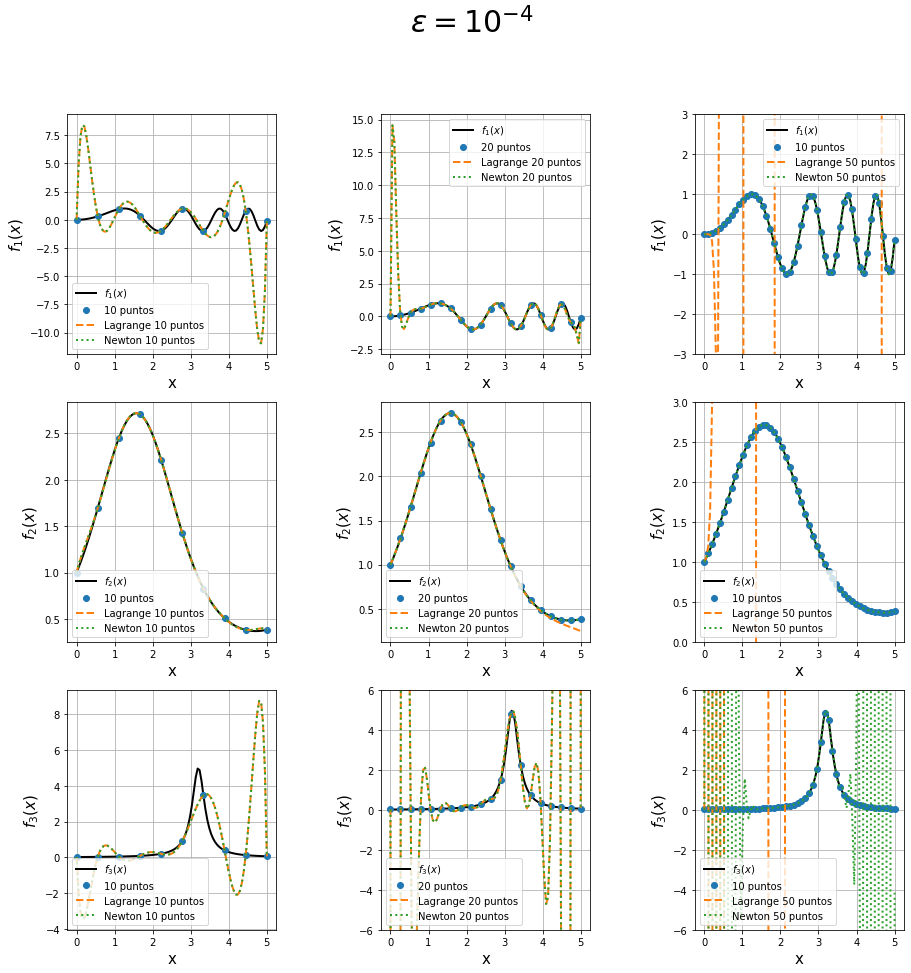

In [ ]:
# Hagamos la grafica.
fig, axs = plt.subplots(3,3,figsize = (15,15))
fig.subplots_adjust(wspace=0.5)

axs[0,0].plot(x_100, f_1(x_100), color = 'k', linewidth=2, label='$f_1(x)$') # Funcion original.
axs[0,0].plot(x_10, z_1_10_4, 'o',label='10 puntos') # 10 puntos
axs[0,0].plot(x_100, l_1_10_4(x_100), linewidth=2, linestyle = 'dashed', label='Lagrange 10 puntos') # Interpolacion con 10 puntos.
axs[0,0].plot(x_100, n_1_10_4, linewidth=2, linestyle = 'dotted', label='Newton 10 puntos') # Interpolacion con 10 puntos.
axs[0,0].set_xlabel('x', fontsize=15)
axs[0,0].set_ylabel('$f_1(x)$',fontsize=15)
axs[0,0].legend(loc = 'lower left')
axs[0,0].grid()

axs[0,1].plot(x_100, f_1(x_100), color = 'k', linewidth=2, label='$f_1(x)$') # Funcion original.
axs[0,1].plot(x_20, z_1_20_4, 'o',label='20 puntos') # 20 puntos
axs[0,1].plot(x_100, l_1_20_4(x_100), linewidth=2, linestyle = 'dashed', label='Lagrange 20 puntos') # Interpolacion con 20 puntos.
axs[0,1].plot(x_100, n_1_20_4, linewidth=2, linestyle = 'dotted', label='Newton 20 puntos') # Interpolacion con 20 puntos.
axs[0,1].set_xlabel('x', fontsize=15)
axs[0,1].set_ylabel('$f_1(x)$',fontsize=15)
axs[0,1].legend(loc = 'best')
axs[0,1].grid()

axs[0,2].plot(x_100, f_1(x_100), color = 'k', linewidth=2, label='$f_1(x)$') # Funcion original.
axs[0,2].plot(x_50, z_1_50_4, 'o',label='10 puntos') # 10 puntos
axs[0,2].plot(x_100, l_1_50_4(x_100), linewidth=2, linestyle = 'dashed', label='Lagrange 50 puntos') # Interpolacion con 10 puntos.
axs[0,2].plot(x_100, n_1_50_4, linewidth=2, linestyle = 'dotted', label='Newton 50 puntos') # Interpolacion con 10 puntos.
axs[0,2].set_xlabel('x', fontsize=15)
axs[0,2].set_ylabel('$f_1(x)$',fontsize=15)
axs[0,2].legend(loc = 'best')
axs[0,2].set_ylim(-3.0,3.0)
axs[0,2].grid()

axs[1,0].plot(x_100, f_2(x_100), color = 'k', linewidth=2, label='$f_2(x)$') # Funcion original.
axs[1,0].plot(x_10, z_2_10_4, 'o',label='10 puntos') # 10 puntos
axs[1,0].plot(x_100, l_2_10_4(x_100), linewidth=2, linestyle = 'dashed', label='Lagrange 10 puntos') # Interpolacion con 10 puntos.
axs[1,0].plot(x_100, n_2_10_4, linewidth=2, linestyle = 'dotted', label='Newton 10 puntos') # Interpolacion con 10 puntos.
axs[1,0].set_xlabel('x', fontsize=15)
axs[1,0].set_ylabel('$f_2(x)$',fontsize=15)
axs[1,0].legend(loc = 'lower left')
axs[1,0].grid()

axs[1,1].plot(x_100, f_2(x_100), color = 'k', linewidth=2, label='$f_2(x)$') # Funcion original.
axs[1,1].plot(x_20, z_2_20_4, 'o',label='20 puntos') # 20 puntos
axs[1,1].plot(x_100, l_2_20_4(x_100), linewidth=2, linestyle = 'dashed', label='Lagrange 20 puntos') # Interpolacion con 20 puntos.
axs[1,1].plot(x_100, n_2_20_4, linewidth=2, linestyle = 'dotted', label='Newton 20 puntos') # Interpolacion con 20 puntos.
axs[1,1].set_xlabel('x', fontsize=15)
axs[1,1].set_ylabel('$f_2(x)$',fontsize=15)
axs[1,1].legend(loc = 'best')
axs[1,1].grid()

axs[1,2].plot(x_100, f_2(x_100), color = 'k', linewidth=2, label='$f_2(x)$') # Funcion original.
axs[1,2].plot(x_50, z_2_50_4, 'o',label='10 puntos') # 10 puntos
axs[1,2].plot(x_100, l_2_50_4(x_100), linewidth=2, linestyle = 'dashed', label='Lagrange 50 puntos') # Interpolacion con 10 puntos.
axs[1,2].plot(x_100, n_2_50_4, linewidth=2, linestyle = 'dotted', label='Newton 50 puntos') # Interpolacion con 10 puntos.
axs[1,2].set_xlabel('x', fontsize=15)
axs[1,2].set_ylabel('$f_2(x)$',fontsize=15)
axs[1,2].legend(loc = 'best')
axs[1,2].set_ylim(0.0,3.0)
axs[1,2].grid()

axs[2,0].plot(x_100, f_3(x_100), color = 'k', linewidth=2, label='$f_3(x)$') # Funcion original.
axs[2,0].plot(x_10, z_3_10_4, 'o',label='10 puntos') # 10 puntos
axs[2,0].plot(x_100, l_3_10_4(x_100), linewidth=2, linestyle = 'dashed', label='Lagrange 10 puntos') # Interpolacion con 10 puntos.
axs[2,0].plot(x_100, n_3_10_4, linewidth=2, linestyle = 'dotted', label='Newton 10 puntos') # Interpolacion con 10 puntos.
axs[2,0].set_xlabel('x', fontsize=15)
axs[2,0].set_ylabel('$f_3(x)$',fontsize=15)
axs[2,0].legend(loc = 'lower left')
axs[2,0].grid()

axs[2,1].plot(x_100, f_3(x_100), color = 'k', linewidth=2, label='$f_3(x)$') # Funcion original.
axs[2,1].plot(x_20, z_3_20_4, 'o',label='20 puntos') # 20 puntos
axs[2,1].plot(x_100, l_3_20_4(x_100), linewidth=2, linestyle = 'dashed', label='Lagrange 20 puntos') # Interpolacion con 20 puntos.
axs[2,1].plot(x_100, n_3_20_4, linewidth=2, linestyle = 'dotted', label='Newton 20 puntos') # Interpolacion con 20 puntos.
axs[2,1].set_xlabel('x', fontsize=15)
axs[2,1].set_ylabel('$f_3(x)$',fontsize=15)
axs[2,1].legend(loc = 'best')
axs[2,1].set_ylim(-6.0,6.0)
axs[2,1].grid()

axs[2,2].plot(x_100, f_3(x_100)+ep[0]*np.sin(x_100), color = 'k', linewidth=2, label='$f_3(x)$') # Funcion original.
axs[2,2].plot(x_50, z_3_50_4, 'o',label='10 puntos') # 10 puntos
axs[2,2].plot(x_100, l_3_50_4(x_100), linewidth=2, linestyle = 'dashed', label='Lagrange 50 puntos') # Interpolacion con 10 puntos.
axs[2,2].plot(x_100, n_3_50_4, linewidth=2, linestyle = 'dotted', label='Newton 50 puntos') # Interpolacion con 10 puntos.
axs[2,2].set_xlabel('x', fontsize=15)
axs[2,2].set_ylabel('$f_3(x)$',fontsize=15)
axs[2,2].legend(loc = 'best')
axs[2,2].set_ylim(-6.0,6.0)
axs[2,2].grid()

fig.suptitle('$\epsilon = 10^{-4}$', fontsize=30)
plt.show()

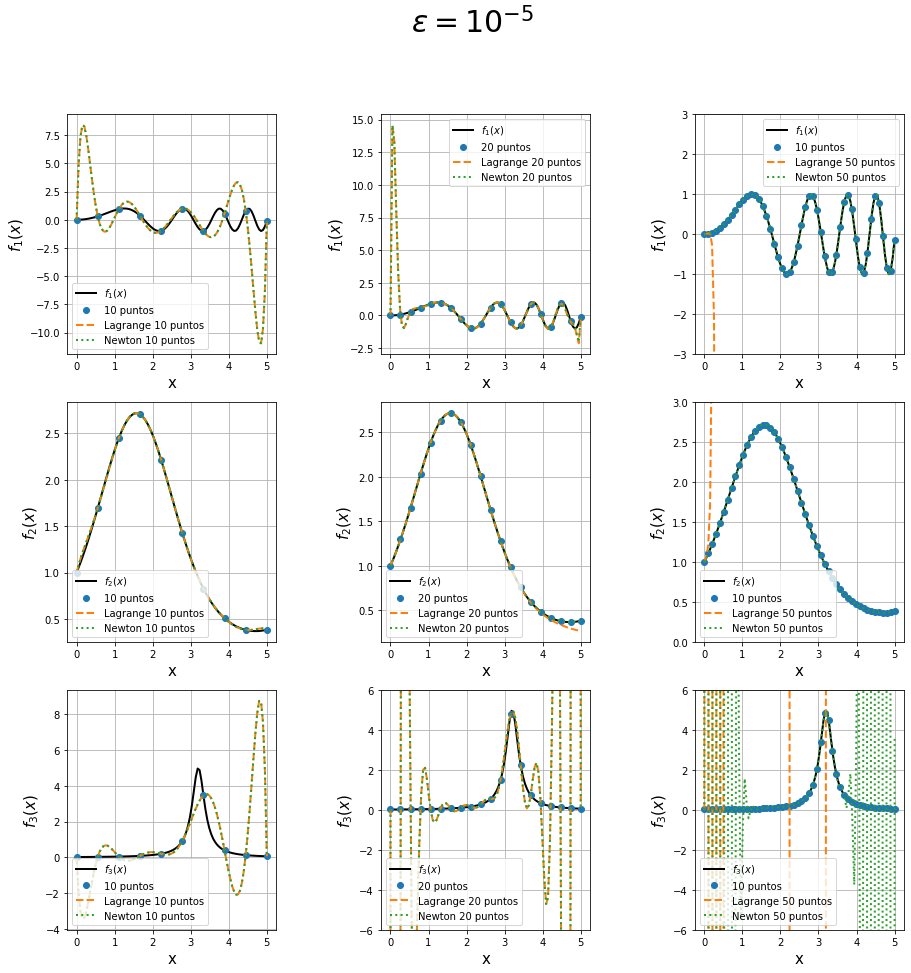

In [ ]:
# Hagamos la grafica.
fig, axs = plt.subplots(3,3,figsize = (15,15))
fig.subplots_adjust(wspace=0.5)

axs[0,0].plot(x_100, f_1(x_100), color = 'k', linewidth=2, label='$f_1(x)$') # Funcion original.
axs[0,0].plot(x_10, z_1_10_5, 'o',label='10 puntos') # 10 puntos
axs[0,0].plot(x_100, l_1_10_5(x_100), linewidth=2, linestyle = 'dashed', label='Lagrange 10 puntos') # Interpolacion con 10 puntos.
axs[0,0].plot(x_100, n_1_10_5, linewidth=2, linestyle = 'dotted', label='Newton 10 puntos') # Interpolacion con 10 puntos.
axs[0,0].set_xlabel('x', fontsize=15)
axs[0,0].set_ylabel('$f_1(x)$',fontsize=15)
axs[0,0].legend(loc = 'lower left')
axs[0,0].grid()

axs[0,1].plot(x_100, f_1(x_100), color = 'k', linewidth=2, label='$f_1(x)$') # Funcion original.
axs[0,1].plot(x_20, z_1_20_5, 'o',label='20 puntos') # 20 puntos
axs[0,1].plot(x_100, l_1_20_5(x_100), linewidth=2, linestyle = 'dashed', label='Lagrange 20 puntos') # Interpolacion con 20 puntos.
axs[0,1].plot(x_100, n_1_20_5, linewidth=2, linestyle = 'dotted', label='Newton 20 puntos') # Interpolacion con 20 puntos.
axs[0,1].set_xlabel('x', fontsize=15)
axs[0,1].set_ylabel('$f_1(x)$',fontsize=15)
axs[0,1].legend(loc = 'best')
axs[0,1].grid()

axs[0,2].plot(x_100, f_1(x_100), color = 'k', linewidth=2, label='$f_1(x)$') # Funcion original.
axs[0,2].plot(x_50, z_1_50_5, 'o',label='10 puntos') # 10 puntos
axs[0,2].plot(x_100, l_1_50_5(x_100), linewidth=2, linestyle = 'dashed', label='Lagrange 50 puntos') # Interpolacion con 10 puntos.
axs[0,2].plot(x_100, n_1_50_5, linewidth=2, linestyle = 'dotted', label='Newton 50 puntos') # Interpolacion con 10 puntos.
axs[0,2].set_xlabel('x', fontsize=15)
axs[0,2].set_ylabel('$f_1(x)$',fontsize=15)
axs[0,2].legend(loc = 'best')
axs[0,2].set_ylim(-3.0,3.0)
axs[0,2].grid()

axs[1,0].plot(x_100, f_2(x_100), color = 'k', linewidth=2, label='$f_2(x)$') # Funcion original.
axs[1,0].plot(x_10, z_2_10_5, 'o',label='10 puntos') # 10 puntos
axs[1,0].plot(x_100, l_2_10_5(x_100), linewidth=2, linestyle = 'dashed', label='Lagrange 10 puntos') # Interpolacion con 10 puntos.
axs[1,0].plot(x_100, n_2_10_5, linewidth=2, linestyle = 'dotted', label='Newton 10 puntos') # Interpolacion con 10 puntos.
axs[1,0].set_xlabel('x', fontsize=15)
axs[1,0].set_ylabel('$f_2(x)$',fontsize=15)
axs[1,0].legend(loc = 'lower left')
axs[1,0].grid()

axs[1,1].plot(x_100, f_2(x_100), color = 'k', linewidth=2, label='$f_2(x)$') # Funcion original.
axs[1,1].plot(x_20, z_2_20_5, 'o',label='20 puntos') # 20 puntos
axs[1,1].plot(x_100, l_2_20_5(x_100), linewidth=2, linestyle = 'dashed', label='Lagrange 20 puntos') # Interpolacion con 20 puntos.
axs[1,1].plot(x_100, n_2_20_5, linewidth=2, linestyle = 'dotted', label='Newton 20 puntos') # Interpolacion con 20 puntos.
axs[1,1].set_xlabel('x', fontsize=15)
axs[1,1].set_ylabel('$f_2(x)$',fontsize=15)
axs[1,1].legend(loc = 'best')
axs[1,1].grid()

axs[1,2].plot(x_100, f_2(x_100), color = 'k', linewidth=2, label='$f_2(x)$') # Funcion original.
axs[1,2].plot(x_50, z_2_50_5, 'o',label='10 puntos') # 10 puntos
axs[1,2].plot(x_100, l_2_50_5(x_100), linewidth=2, linestyle = 'dashed', label='Lagrange 50 puntos') # Interpolacion con 10 puntos.
axs[1,2].plot(x_100, n_2_50_5, linewidth=2, linestyle = 'dotted', label='Newton 50 puntos') # Interpolacion con 10 puntos.
axs[1,2].set_xlabel('x', fontsize=15)
axs[1,2].set_ylabel('$f_2(x)$',fontsize=15)
axs[1,2].legend(loc = 'best')
axs[1,2].set_ylim(0.0,3.0)
axs[1,2].grid()

axs[2,0].plot(x_100, f_3(x_100), color = 'k', linewidth=2, label='$f_3(x)$') # Funcion original.
axs[2,0].plot(x_10, z_3_10_5, 'o',label='10 puntos') # 10 puntos
axs[2,0].plot(x_100, l_3_10_5(x_100), linewidth=2, linestyle = 'dashed', label='Lagrange 10 puntos') # Interpolacion con 10 puntos.
axs[2,0].plot(x_100, n_3_10_5, linewidth=2, linestyle = 'dotted', label='Newton 10 puntos') # Interpolacion con 10 puntos.
axs[2,0].set_xlabel('x', fontsize=15)
axs[2,0].set_ylabel('$f_3(x)$',fontsize=15)
axs[2,0].legend(loc = 'lower left')
axs[2,0].grid()

axs[2,1].plot(x_100, f_3(x_100), color = 'k', linewidth=2, label='$f_3(x)$') # Funcion original.
axs[2,1].plot(x_20, z_3_20_5, 'o',label='20 puntos') # 20 puntos
axs[2,1].plot(x_100, l_3_20_5(x_100), linewidth=2, linestyle = 'dashed', label='Lagrange 20 puntos') # Interpolacion con 20 puntos.
axs[2,1].plot(x_100, n_3_20_5, linewidth=2, linestyle = 'dotted', label='Newton 20 puntos') # Interpolacion con 20 puntos.
axs[2,1].set_xlabel('x', fontsize=15)
axs[2,1].set_ylabel('$f_3(x)$',fontsize=15)
axs[2,1].legend(loc = 'best')
axs[2,1].set_ylim(-6.0,6.0)
axs[2,1].grid()

axs[2,2].plot(x_100, f_3(x_100)+ep[0]*np.sin(x_100), color = 'k', linewidth=2, label='$f_3(x)$') # Funcion original.
axs[2,2].plot(x_50, z_3_50_5, 'o',label='10 puntos') # 10 puntos
axs[2,2].plot(x_100, l_3_50_5(x_100), linewidth=2, linestyle = 'dashed', label='Lagrange 50 puntos') # Interpolacion con 10 puntos.
axs[2,2].plot(x_100, n_3_50_5, linewidth=2, linestyle = 'dotted', label='Newton 50 puntos') # Interpolacion con 10 puntos.
axs[2,2].set_xlabel('x', fontsize=15)
axs[2,2].set_ylabel('$f_3(x)$',fontsize=15)
axs[2,2].legend(loc = 'best')
axs[2,2].set_ylim(-6.0,6.0)
axs[2,2].grid()

fig.suptitle('$\epsilon = 10^{-5}$', fontsize=30)
plt.show()

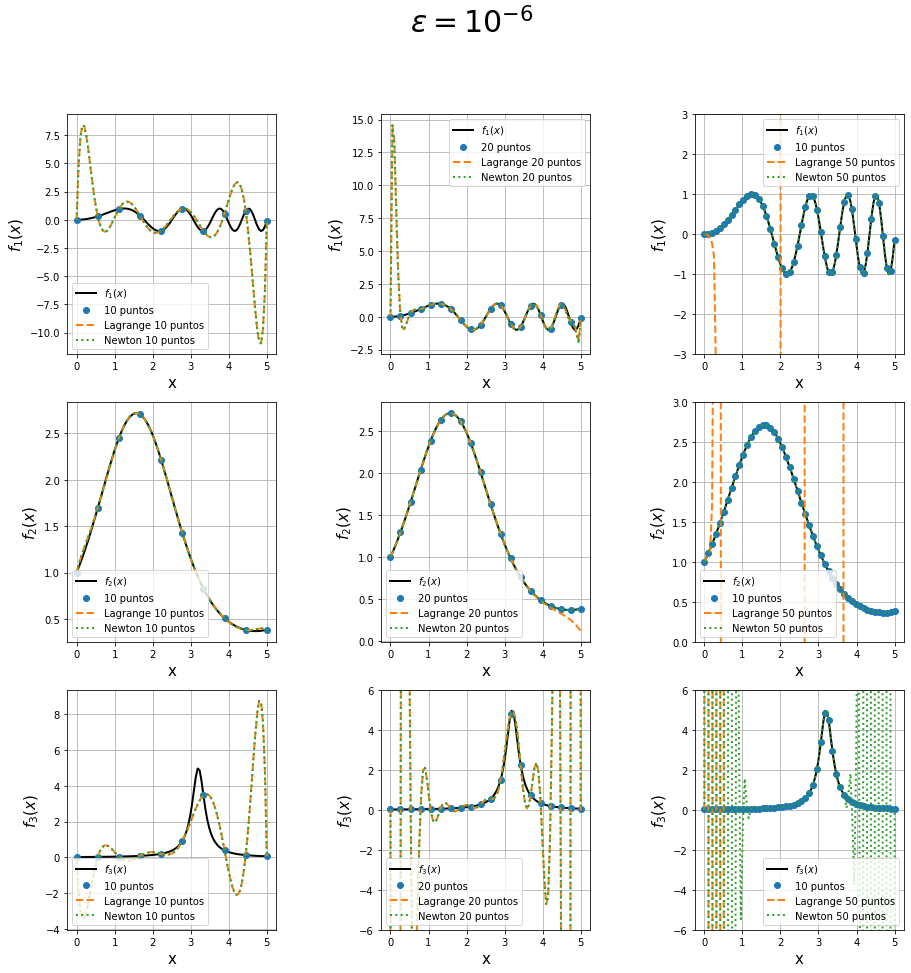

In [ ]:
# Hagamos la grafica.
fig, axs = plt.subplots(3,3,figsize = (15,15))
fig.subplots_adjust(wspace=0.5)

axs[0,0].plot(x_100, f_1(x_100), color = 'k', linewidth=2, label='$f_1(x)$') # Funcion original.
axs[0,0].plot(x_10, z_1_10_6, 'o',label='10 puntos') # 10 puntos
axs[0,0].plot(x_100, l_1_10_6(x_100), linewidth=2, linestyle = 'dashed', label='Lagrange 10 puntos') # Interpolacion con 10 puntos.
axs[0,0].plot(x_100, n_1_10_6, linewidth=2, linestyle = 'dotted', label='Newton 10 puntos') # Interpolacion con 10 puntos.
axs[0,0].set_xlabel('x', fontsize=15)
axs[0,0].set_ylabel('$f_1(x)$',fontsize=15)
axs[0,0].legend(loc = 'lower left')
axs[0,0].grid()

axs[0,1].plot(x_100, f_1(x_100), color = 'k', linewidth=2, label='$f_1(x)$') # Funcion original.
axs[0,1].plot(x_20, z_1_20_6, 'o',label='20 puntos') # 20 puntos
axs[0,1].plot(x_100, l_1_20_6(x_100), linewidth=2, linestyle = 'dashed', label='Lagrange 20 puntos') # Interpolacion con 20 puntos.
axs[0,1].plot(x_100, n_1_20_6, linewidth=2, linestyle = 'dotted', label='Newton 20 puntos') # Interpolacion con 20 puntos.
axs[0,1].set_xlabel('x', fontsize=15)
axs[0,1].set_ylabel('$f_1(x)$',fontsize=15)
axs[0,1].legend(loc = 'best')
axs[0,1].grid()

axs[0,2].plot(x_100, f_1(x_100), color = 'k', linewidth=2, label='$f_1(x)$') # Funcion original.
axs[0,2].plot(x_50, z_1_50_6, 'o',label='10 puntos') # 10 puntos
axs[0,2].plot(x_100, l_1_50_6(x_100), linewidth=2, linestyle = 'dashed', label='Lagrange 50 puntos') # Interpolacion con 10 puntos.
axs[0,2].plot(x_100, n_1_50_6, linewidth=2, linestyle = 'dotted', label='Newton 50 puntos') # Interpolacion con 10 puntos.
axs[0,2].set_xlabel('x', fontsize=15)
axs[0,2].set_ylabel('$f_1(x)$',fontsize=15)
axs[0,2].legend(loc = 'best')
axs[0,2].set_ylim(-3.0,3.0)
axs[0,2].grid()

axs[1,0].plot(x_100, f_2(x_100), color = 'k', linewidth=2, label='$f_2(x)$') # Funcion original.
axs[1,0].plot(x_10, z_2_10_6, 'o',label='10 puntos') # 10 puntos
axs[1,0].plot(x_100, l_2_10_6(x_100), linewidth=2, linestyle = 'dashed', label='Lagrange 10 puntos') # Interpolacion con 10 puntos.
axs[1,0].plot(x_100, n_2_10_6, linewidth=2, linestyle = 'dotted', label='Newton 10 puntos') # Interpolacion con 10 puntos.
axs[1,0].set_xlabel('x', fontsize=15)
axs[1,0].set_ylabel('$f_2(x)$',fontsize=15)
axs[1,0].legend(loc = 'lower left')
axs[1,0].grid()

axs[1,1].plot(x_100, f_2(x_100), color = 'k', linewidth=2, label='$f_2(x)$') # Funcion original.
axs[1,1].plot(x_20, z_2_20_6, 'o',label='20 puntos') # 20 puntos
axs[1,1].plot(x_100, l_2_20_6(x_100), linewidth=2, linestyle = 'dashed', label='Lagrange 20 puntos') # Interpolacion con 20 puntos.
axs[1,1].plot(x_100, n_2_20_6, linewidth=2, linestyle = 'dotted', label='Newton 20 puntos') # Interpolacion con 20 puntos.
axs[1,1].set_xlabel('x', fontsize=15)
axs[1,1].set_ylabel('$f_2(x)$',fontsize=15)
axs[1,1].legend(loc = 'best')
axs[1,1].grid()

axs[1,2].plot(x_100, f_2(x_100), color = 'k', linewidth=2, label='$f_2(x)$') # Funcion original.
axs[1,2].plot(x_50, z_2_50_6, 'o',label='10 puntos') # 10 puntos
axs[1,2].plot(x_100, l_2_50_6(x_100), linewidth=2, linestyle = 'dashed', label='Lagrange 50 puntos') # Interpolacion con 10 puntos.
axs[1,2].plot(x_100, n_2_50_6, linewidth=2, linestyle = 'dotted', label='Newton 50 puntos') # Interpolacion con 10 puntos.
axs[1,2].set_xlabel('x', fontsize=15)
axs[1,2].set_ylabel('$f_2(x)$',fontsize=15)
axs[1,2].legend(loc = 'best')
axs[1,2].set_ylim(0.0,3.0)
axs[1,2].grid()

axs[2,0].plot(x_100, f_3(x_100), color = 'k', linewidth=2, label='$f_3(x)$') # Funcion original.
axs[2,0].plot(x_10, z_3_10_6, 'o',label='10 puntos') # 10 puntos
axs[2,0].plot(x_100, l_3_10_6(x_100), linewidth=2, linestyle = 'dashed', label='Lagrange 10 puntos') # Interpolacion con 10 puntos.
axs[2,0].plot(x_100, n_3_10_6, linewidth=2, linestyle = 'dotted', label='Newton 10 puntos') # Interpolacion con 10 puntos.
axs[2,0].set_xlabel('x', fontsize=15)
axs[2,0].set_ylabel('$f_3(x)$',fontsize=15)
axs[2,0].legend(loc = 'lower left')
axs[2,0].grid()

axs[2,1].plot(x_100, f_3(x_100), color = 'k', linewidth=2, label='$f_3(x)$') # Funcion original.
axs[2,1].plot(x_20, z_3_20_6, 'o',label='20 puntos') # 20 puntos
axs[2,1].plot(x_100, l_3_20_6(x_100), linewidth=2, linestyle = 'dashed', label='Lagrange 20 puntos') # Interpolacion con 20 puntos.
axs[2,1].plot(x_100, n_3_20_6, linewidth=2, linestyle = 'dotted', label='Newton 20 puntos') # Interpolacion con 20 puntos.
axs[2,1].set_xlabel('x', fontsize=15)
axs[2,1].set_ylabel('$f_3(x)$',fontsize=15)
axs[2,1].legend(loc = 'best')
axs[2,1].set_ylim(-6.0,6.0)
axs[2,1].grid()

axs[2,2].plot(x_100, f_3(x_100)+ep[0]*np.sin(x_100), color = 'k', linewidth=2, label='$f_3(x)$') # Funcion original.
axs[2,2].plot(x_50, z_3_50_6, 'o',label='10 puntos') # 10 puntos
axs[2,2].plot(x_100, l_3_50_6(x_100), linewidth=2, linestyle = 'dashed', label='Lagrange 50 puntos') # Interpolacion con 10 puntos.
axs[2,2].plot(x_100, n_3_50_6, linewidth=2, linestyle = 'dotted', label='Newton 50 puntos') # Interpolacion con 10 puntos.
axs[2,2].set_xlabel('x', fontsize=15)
axs[2,2].set_ylabel('$f_3(x)$',fontsize=15)
axs[2,2].legend(loc = 'best')
axs[2,2].set_ylim(-6.0,6.0)
axs[2,2].grid()

fig.suptitle('$\epsilon = 10^{-6}$', fontsize=30)
plt.show()

A primera vista no podemos apreciar una diferencia notable entre la función original y las interpolaciones hechas con las perturbaciones. Veamos los errores.

In [ ]:
# Lagrange.

# f_1
e_1_10_4 = np.abs(f_1(x_100)-l_1_10_4(x_100))
e_1_20_4 = np.abs(f_1(x_100)-l_1_20_4(x_100))
e_1_50_4 = np.abs(f_1(x_100)-l_1_50_4(x_100))

e_1_10_5 = np.abs(f_1(x_100)-l_1_10_5(x_100))
e_1_20_5 = np.abs(f_1(x_100)-l_1_20_5(x_100))
e_1_50_5 = np.abs(f_1(x_100)-l_1_50_5(x_100))

e_1_10_6 = np.abs(f_1(x_100)-l_1_10_6(x_100))
e_1_20_6 = np.abs(f_1(x_100)-l_1_20_6(x_100))
e_1_50_6 = np.abs(f_1(x_100)-l_1_50_6(x_100))

# f_2
e_2_10_4 = np.abs(f_2(x_100)-l_2_10_4(x_100))
e_2_20_4 = np.abs(f_2(x_100)-l_2_20_4(x_100))
e_2_50_4 = np.abs(f_2(x_100)-l_2_50_4(x_100))

e_2_10_5 = np.abs(f_2(x_100)-l_2_10_5(x_100))
e_2_20_5 = np.abs(f_2(x_100)-l_2_20_5(x_100))
e_2_50_5 = np.abs(f_2(x_100)-l_2_50_5(x_100))

e_2_10_6 = np.abs(f_2(x_100)-l_2_10_6(x_100))
e_2_20_6 = np.abs(f_2(x_100)-l_2_20_6(x_100))
e_2_50_6 = np.abs(f_2(x_100)-l_2_50_6(x_100))

# f_3
e_3_10_4 = np.abs(f_3(x_100)-l_3_10_4(x_100))
e_3_20_4 = np.abs(f_3(x_100)-l_3_20_4(x_100))
e_3_50_4 = np.abs(f_3(x_100)-l_3_50_4(x_100))

e_3_10_5 = np.abs(f_3(x_100)-l_3_10_5(x_100))
e_3_20_5 = np.abs(f_3(x_100)-l_3_20_5(x_100))
e_3_50_5 = np.abs(f_3(x_100)-l_3_50_5(x_100))

e_3_10_6 = np.abs(f_3(x_100)-l_3_10_6(x_100))
e_3_20_6 = np.abs(f_3(x_100)-l_3_20_6(x_100))
e_3_50_6 = np.abs(f_3(x_100)-l_3_50_6(x_100))


# Newton.

# f_1
en_1_10_4 = np.abs(f_1(x_100)-n_1_10_4)
en_1_20_4 = np.abs(f_1(x_100)-n_1_20_4)
en_1_50_4 = np.abs(f_1(x_100)-n_1_50_4)

en_1_10_5 = np.abs(f_1(x_100)-n_1_10_5)
en_1_20_5 = np.abs(f_1(x_100)-n_1_20_5)
en_1_50_5 = np.abs(f_1(x_100)-n_1_50_5)

en_1_10_6 = np.abs(f_1(x_100)-n_1_10_6)
en_1_20_6 = np.abs(f_1(x_100)-n_1_20_6)
en_1_50_6 = np.abs(f_1(x_100)-n_1_50_6)

# f_2
en_2_10_4 = np.abs(f_2(x_100)-n_2_10_4)
en_2_20_4 = np.abs(f_2(x_100)-n_2_20_4)
en_2_50_4 = np.abs(f_2(x_100)-n_2_50_4)

en_2_10_5 = np.abs(f_2(x_100)-n_2_10_5)
en_2_20_5 = np.abs(f_2(x_100)-n_2_20_5)
en_2_50_5 = np.abs(f_2(x_100)-n_2_50_5)

en_2_10_6 = np.abs(f_2(x_100)-n_2_10_6)
en_2_20_6 = np.abs(f_2(x_100)-n_2_20_6)
en_2_50_6 = np.abs(f_2(x_100)-n_2_50_6)

# f_3
en_3_10_4 = np.abs(f_3(x_100)-n_3_10_4)
en_3_20_4 = np.abs(f_3(x_100)-n_3_20_4)
en_3_50_4 = np.abs(f_3(x_100)-n_3_50_4)

en_3_10_5 = np.abs(f_3(x_100)-n_3_10_5)
en_3_20_5 = np.abs(f_3(x_100)-n_3_20_5)
en_3_50_5 = np.abs(f_3(x_100)-n_3_50_5)

en_3_10_6 = np.abs(f_3(x_100)-n_3_10_6)
en_3_20_6 = np.abs(f_3(x_100)-n_3_20_6)
en_3_50_6 = np.abs(f_3(x_100)-n_3_50_6)




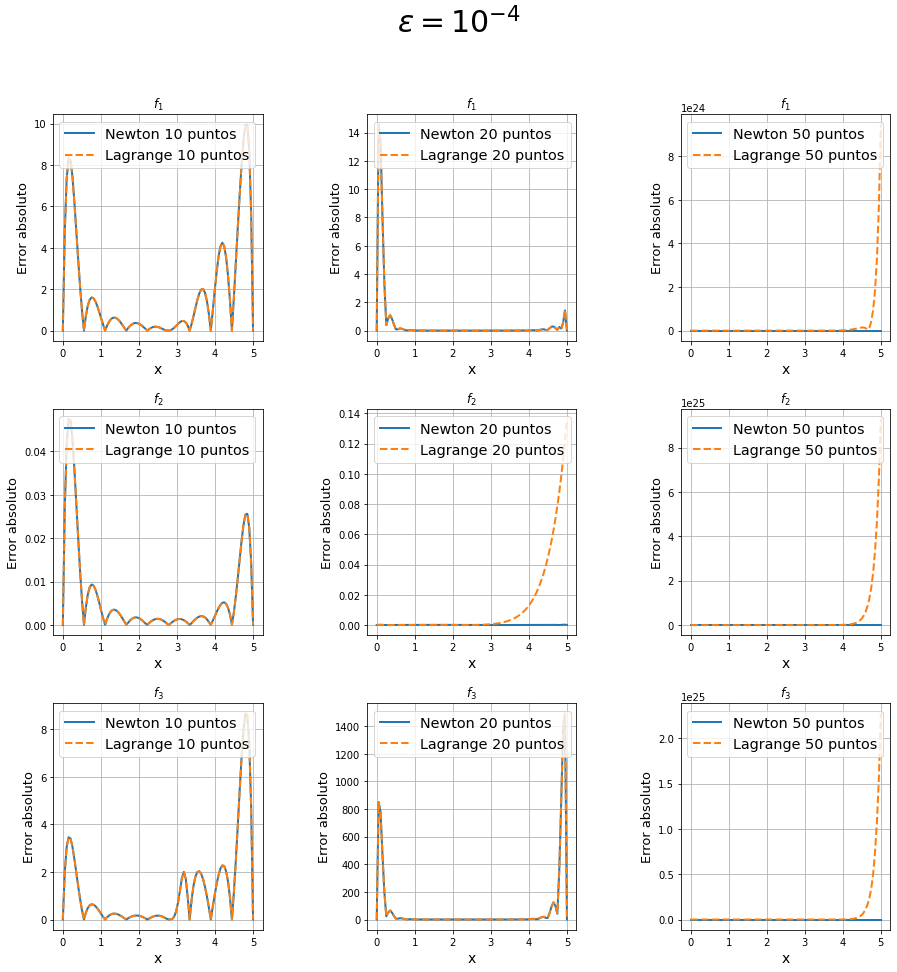

In [ ]:
# Hagamos la grafica.
fig, axs = plt.subplots(3,3,figsize = (15,15))
fig.subplots_adjust(wspace=0.5, hspace=0.3)

axs[0,0].plot(x_100, en_1_10_4, linewidth=2, label='Newton 10 puntos') # Interpolacion con 10 puntos.
axs[0,0].plot(x_100, e_1_10_4, linewidth=2, linestyle='dashed', label='Lagrange 10 puntos') # Interpolacion con 10 puntos.
axs[0,0].set_xlabel('x', fontsize=14)
axs[0,0].set_ylabel('Error absoluto',fontsize=13)
axs[0,0].legend(loc = 'best', fontsize = 'x-large')
axs[0,0].set_title('$f_1$')
axs[0,0].grid()

axs[0,1].plot(x_100, en_1_20_4, linewidth=2, label='Newton 20 puntos') # Interpolacion con 20 puntos.
axs[0,1].plot(x_100, e_1_20_4, linewidth=2, linestyle='dashed', label='Lagrange 20 puntos') # Interpolacion con 20 puntos.
axs[0,1].set_xlabel('x', fontsize=14)
axs[0,1].set_ylabel('Error absoluto',fontsize=13)
axs[0,1].legend(loc = 'upper left', fontsize = 'x-large')
axs[0,1].set_title('$f_1$')
axs[0,1].grid()

axs[0,2].plot(x_100, en_1_50_4, linewidth=2, label='Newton 50 puntos') # Interpolacion con 50 puntos
axs[0,2].plot(x_100, e_1_50_4, linewidth=2, linestyle='dashed', label='Lagrange 50 puntos') # Interpolacion con 50 puntos
axs[0,2].set_xlabel('x', fontsize=14)
axs[0,2].set_ylabel('Error absoluto',fontsize=13)
axs[0,2].legend(loc = 'best', fontsize = 'x-large')
axs[0,2].set_title('$f_1$')
axs[0,2].grid()

axs[1,0].plot(x_100, en_2_10_4, linewidth=2, label='Newton 10 puntos') # Interpolacion con 10 puntos.
axs[1,0].plot(x_100, e_2_10_4, linewidth=2, linestyle='dashed', label='Lagrange 10 puntos') # Interpolacion con 10 puntos.
axs[1,0].set_xlabel('x', fontsize=14)
axs[1,0].set_ylabel('Error absoluto',fontsize=13)
axs[1,0].legend(loc = 'best', fontsize = 'x-large')
axs[1,0].set_title('$f_2$')
axs[1,0].grid()

axs[1,1].plot(x_100, en_2_20_4, linewidth=2, label='Newton 20 puntos') # Interpolacion con 20 puntos.
axs[1,1].plot(x_100, e_2_20_4, linewidth=2, linestyle='dashed', label='Lagrange 20 puntos') # Interpolacion con 20 puntos.
axs[1,1].set_xlabel('x', fontsize=14)
axs[1,1].set_ylabel('Error absoluto',fontsize=13)
axs[1,1].legend(loc = 'upper left', fontsize = 'x-large')
axs[1,1].set_title('$f_2$')
axs[1,1].grid()

axs[1,2].plot(x_100, en_2_50_4, linewidth=2, label='Newton 50 puntos') # Interpolacion con 50 puntos
axs[1,2].plot(x_100, e_2_50_4, linewidth=2, linestyle='dashed', label='Lagrange 50 puntos') # Interpolacion con 50 puntos
axs[1,2].set_xlabel('x', fontsize=14)
axs[1,2].set_ylabel('Error absoluto',fontsize=13)
axs[1,2].legend(loc = 'best', fontsize = 'x-large')
axs[1,2].set_title('$f_2$')
axs[1,2].grid()

axs[2,0].plot(x_100, en_3_10_4, linewidth=2, label='Newton 10 puntos') # Interpolacion con 10 puntos.
axs[2,0].plot(x_100, e_3_10_4, linewidth=2, linestyle='dashed', label='Lagrange 10 puntos') # Interpolacion con 10 puntos.
axs[2,0].set_xlabel('x', fontsize=14)
axs[2,0].set_ylabel('Error absoluto',fontsize=13)
axs[2,0].legend(loc = 'best', fontsize = 'x-large')
axs[2,0].set_title('$f_3$')
axs[2,0].grid()

axs[2,1].plot(x_100, en_3_20_4, linewidth=2, label='Newton 20 puntos') # Interpolacion con 20 puntos.
axs[2,1].plot(x_100, e_3_20_4, linewidth=2, linestyle='dashed', label='Lagrange 20 puntos') # Interpolacion con 20 puntos.
axs[2,1].set_xlabel('x', fontsize=14)
axs[2,1].set_ylabel('Error absoluto',fontsize=13)
axs[2,1].legend(loc = 'upper left', fontsize = 'x-large')
axs[2,1].set_title('$f_3$')
axs[2,1].grid()

axs[2,2].plot(x_100, en_3_50_4, linewidth=2, label='Newton 50 puntos') # Interpolacion con 50 puntos
axs[2,2].plot(x_100, e_3_50_4, linewidth=2, linestyle='dashed', label='Lagrange 50 puntos') # Interpolacion con 50 puntos
axs[2,2].set_xlabel('x', fontsize=14)
axs[2,2].set_ylabel('Error absoluto',fontsize=13)
axs[2,2].legend(loc = 'best', fontsize = 'x-large')
axs[2,2].set_title('$f_3$')
axs[2,2].grid()

fig.suptitle('$\epsilon = 10^{-4}$', fontsize=30)
plt.show()

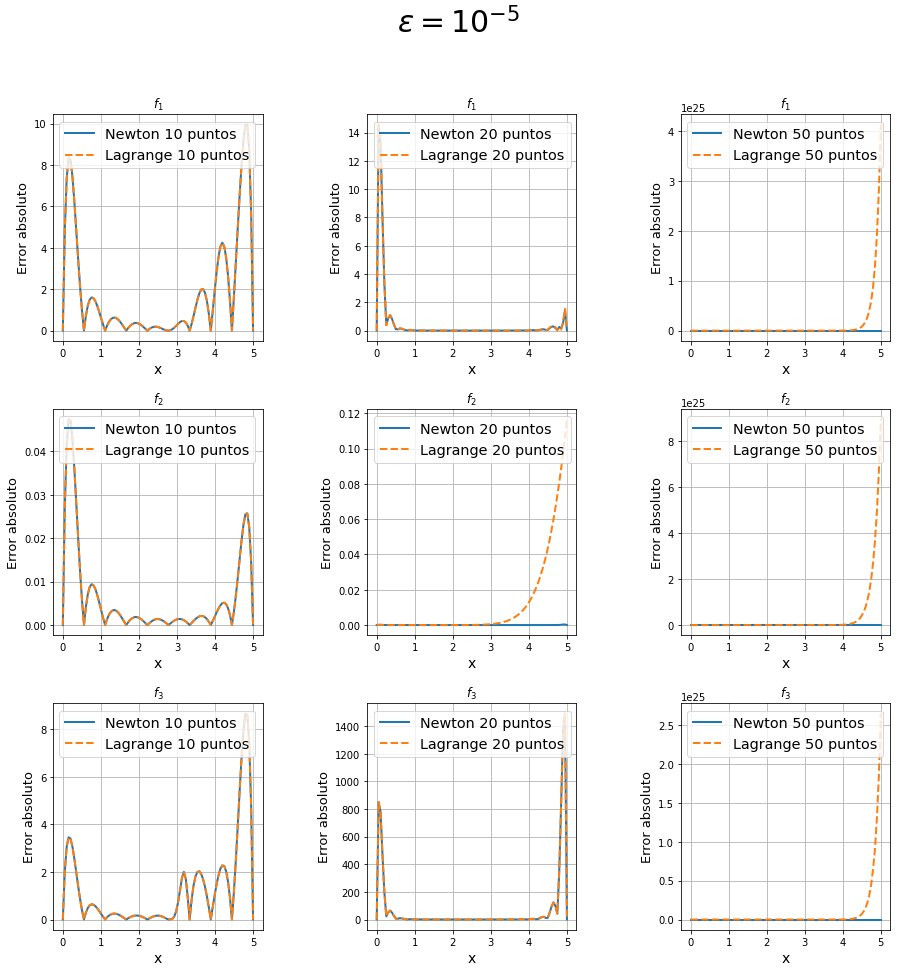

In [ ]:
# Hagamos la grafica.
fig, axs = plt.subplots(3,3,figsize = (15,15))
fig.subplots_adjust(wspace=0.5, hspace=0.3)

axs[0,0].plot(x_100, en_1_10_5, linewidth=2, label='Newton 10 puntos') # Interpolacion con 10 puntos.
axs[0,0].plot(x_100, e_1_10_5, linewidth=2, linestyle='dashed', label='Lagrange 10 puntos') # Interpolacion con 10 puntos.
axs[0,0].set_xlabel('x', fontsize=14)
axs[0,0].set_ylabel('Error absoluto',fontsize=13)
axs[0,0].legend(loc = 'best', fontsize = 'x-large')
axs[0,0].set_title('$f_1$')
axs[0,0].grid()

axs[0,1].plot(x_100, en_1_20_5, linewidth=2, label='Newton 20 puntos') # Interpolacion con 20 puntos.
axs[0,1].plot(x_100, e_1_20_5, linewidth=2, linestyle='dashed', label='Lagrange 20 puntos') # Interpolacion con 20 puntos.
axs[0,1].set_xlabel('x', fontsize=14)
axs[0,1].set_ylabel('Error absoluto',fontsize=13)
axs[0,1].legend(loc = 'upper left', fontsize = 'x-large')
axs[0,1].set_title('$f_1$')
axs[0,1].grid()

axs[0,2].plot(x_100, en_1_50_5, linewidth=2, label='Newton 50 puntos') # Interpolacion con 50 puntos
axs[0,2].plot(x_100, e_1_50_5, linewidth=2, linestyle='dashed', label='Lagrange 50 puntos') # Interpolacion con 50 puntos
axs[0,2].set_xlabel('x', fontsize=14)
axs[0,2].set_ylabel('Error absoluto',fontsize=13)
axs[0,2].legend(loc = 'best', fontsize = 'x-large')
axs[0,2].set_title('$f_1$')
axs[0,2].grid()

axs[1,0].plot(x_100, en_2_10_5, linewidth=2, label='Newton 10 puntos') # Interpolacion con 10 puntos.
axs[1,0].plot(x_100, e_2_10_5, linewidth=2, linestyle='dashed', label='Lagrange 10 puntos') # Interpolacion con 10 puntos.
axs[1,0].set_xlabel('x', fontsize=14)
axs[1,0].set_ylabel('Error absoluto',fontsize=13)
axs[1,0].legend(loc = 'best', fontsize = 'x-large')
axs[1,0].set_title('$f_2$')
axs[1,0].grid()

axs[1,1].plot(x_100, en_2_20_5, linewidth=2, label='Newton 20 puntos') # Interpolacion con 20 puntos.
axs[1,1].plot(x_100, e_2_20_5, linewidth=2, linestyle='dashed', label='Lagrange 20 puntos') # Interpolacion con 20 puntos.
axs[1,1].set_xlabel('x', fontsize=14)
axs[1,1].set_ylabel('Error absoluto',fontsize=13)
axs[1,1].legend(loc = 'upper left', fontsize = 'x-large')
axs[1,1].set_title('$f_2$')
axs[1,1].grid()

axs[1,2].plot(x_100, en_2_50_5, linewidth=2, label='Newton 50 puntos') # Interpolacion con 50 puntos
axs[1,2].plot(x_100, e_2_50_5, linewidth=2, linestyle='dashed', label='Lagrange 50 puntos') # Interpolacion con 50 puntos
axs[1,2].set_xlabel('x', fontsize=14)
axs[1,2].set_ylabel('Error absoluto',fontsize=13)
axs[1,2].legend(loc = 'best', fontsize = 'x-large')
axs[1,2].set_title('$f_2$')
axs[1,2].grid()

axs[2,0].plot(x_100, en_3_10_5, linewidth=2, label='Newton 10 puntos') # Interpolacion con 10 puntos.
axs[2,0].plot(x_100, e_3_10_5, linewidth=2, linestyle='dashed', label='Lagrange 10 puntos') # Interpolacion con 10 puntos.
axs[2,0].set_xlabel('x', fontsize=14)
axs[2,0].set_ylabel('Error absoluto',fontsize=13)
axs[2,0].legend(loc = 'best', fontsize = 'x-large')
axs[2,0].set_title('$f_3$')
axs[2,0].grid()

axs[2,1].plot(x_100, en_3_20_5, linewidth=2, label='Newton 20 puntos') # Interpolacion con 20 puntos.
axs[2,1].plot(x_100, e_3_20_5, linewidth=2, linestyle='dashed', label='Lagrange 20 puntos') # Interpolacion con 20 puntos.
axs[2,1].set_xlabel('x', fontsize=14)
axs[2,1].set_ylabel('Error absoluto',fontsize=13)
axs[2,1].legend(loc = 'upper left', fontsize = 'x-large')
axs[2,1].set_title('$f_3$')
axs[2,1].grid()

axs[2,2].plot(x_100, en_3_50_5, linewidth=2, label='Newton 50 puntos') # Interpolacion con 50 puntos
axs[2,2].plot(x_100, e_3_50_5, linewidth=2, linestyle='dashed', label='Lagrange 50 puntos') # Interpolacion con 50 puntos
axs[2,2].set_xlabel('x', fontsize=14)
axs[2,2].set_ylabel('Error absoluto',fontsize=13)
axs[2,2].legend(loc = 'best', fontsize = 'x-large')
axs[2,2].set_title('$f_3$')
axs[2,2].grid()

fig.suptitle('$\epsilon = 10^{-5}$', fontsize=30)
plt.show()

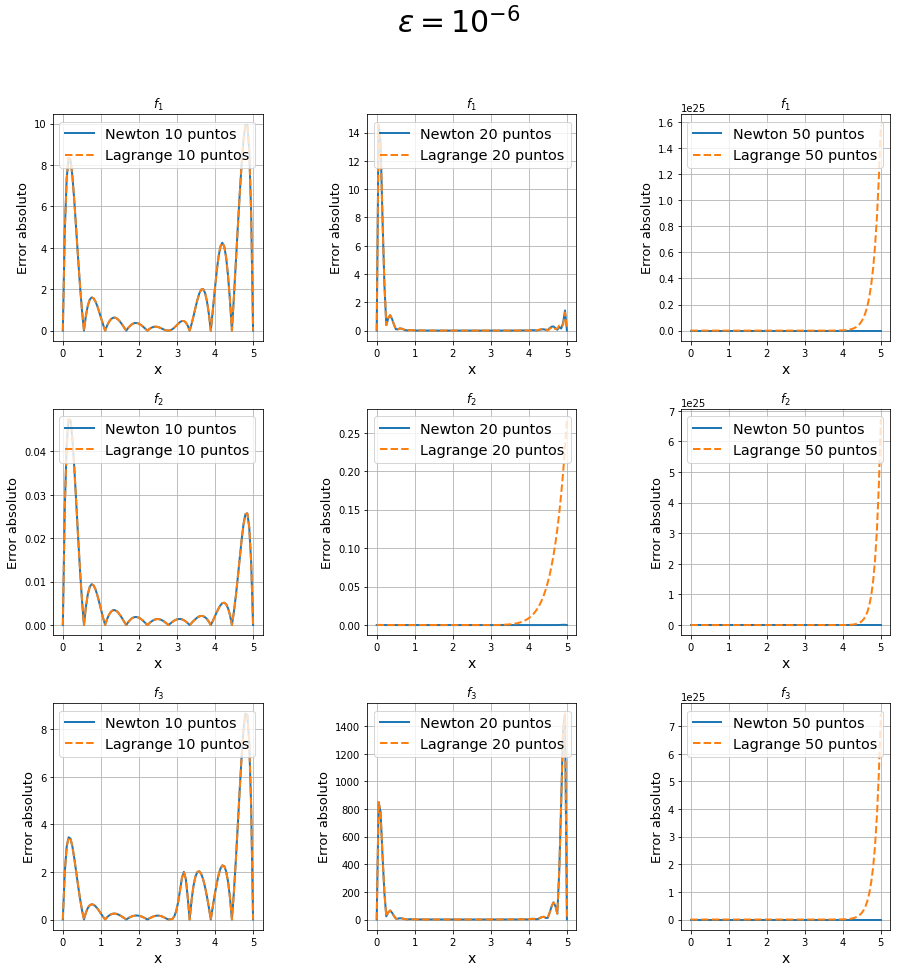

In [ ]:
# Hagamos la grafica.
fig, axs = plt.subplots(3,3,figsize = (15,15))
fig.subplots_adjust(wspace=0.5, hspace=0.3)

axs[0,0].plot(x_100, en_1_10_6, linewidth=2, label='Newton 10 puntos') # Interpolacion con 10 puntos.
axs[0,0].plot(x_100, e_1_10_6, linewidth=2, linestyle='dashed', label='Lagrange 10 puntos') # Interpolacion con 10 puntos.
axs[0,0].set_xlabel('x', fontsize=14)
axs[0,0].set_ylabel('Error absoluto',fontsize=13)
axs[0,0].legend(loc = 'best', fontsize = 'x-large')
axs[0,0].set_title('$f_1$')
axs[0,0].grid()

axs[0,1].plot(x_100, en_1_20_6, linewidth=2, label='Newton 20 puntos') # Interpolacion con 20 puntos.
axs[0,1].plot(x_100, e_1_20_6, linewidth=2, linestyle='dashed', label='Lagrange 20 puntos') # Interpolacion con 20 puntos.
axs[0,1].set_xlabel('x', fontsize=14)
axs[0,1].set_ylabel('Error absoluto',fontsize=13)
axs[0,1].legend(loc = 'upper left', fontsize = 'x-large')
axs[0,1].set_title('$f_1$')
axs[0,1].grid()

axs[0,2].plot(x_100, en_1_50_6, linewidth=2, label='Newton 50 puntos') # Interpolacion con 50 puntos
axs[0,2].plot(x_100, e_1_50_6, linewidth=2, linestyle='dashed', label='Lagrange 50 puntos') # Interpolacion con 50 puntos
axs[0,2].set_xlabel('x', fontsize=14)
axs[0,2].set_ylabel('Error absoluto',fontsize=13)
axs[0,2].legend(loc = 'best', fontsize = 'x-large')
axs[0,2].set_title('$f_1$')
axs[0,2].grid()

axs[1,0].plot(x_100, en_2_10_6, linewidth=2, label='Newton 10 puntos') # Interpolacion con 10 puntos.
axs[1,0].plot(x_100, e_2_10_6, linewidth=2, linestyle='dashed', label='Lagrange 10 puntos') # Interpolacion con 10 puntos.
axs[1,0].set_xlabel('x', fontsize=14)
axs[1,0].set_ylabel('Error absoluto',fontsize=13)
axs[1,0].legend(loc = 'best', fontsize = 'x-large')
axs[1,0].set_title('$f_2$')
axs[1,0].grid()

axs[1,1].plot(x_100, en_2_20_6, linewidth=2, label='Newton 20 puntos') # Interpolacion con 20 puntos.
axs[1,1].plot(x_100, e_2_20_6, linewidth=2, linestyle='dashed', label='Lagrange 20 puntos') # Interpolacion con 20 puntos.
axs[1,1].set_xlabel('x', fontsize=14)
axs[1,1].set_ylabel('Error absoluto',fontsize=13)
axs[1,1].legend(loc = 'upper left', fontsize = 'x-large')
axs[1,1].set_title('$f_2$')
axs[1,1].grid()

axs[1,2].plot(x_100, en_2_50_6, linewidth=2, label='Newton 50 puntos') # Interpolacion con 50 puntos
axs[1,2].plot(x_100, e_2_50_6, linewidth=2, linestyle='dashed', label='Lagrange 50 puntos') # Interpolacion con 50 puntos
axs[1,2].set_xlabel('x', fontsize=14)
axs[1,2].set_ylabel('Error absoluto',fontsize=13)
axs[1,2].legend(loc = 'best', fontsize = 'x-large')
axs[1,2].set_title('$f_2$')
axs[1,2].grid()

axs[2,0].plot(x_100, en_3_10_6, linewidth=2, label='Newton 10 puntos') # Interpolacion con 10 puntos.
axs[2,0].plot(x_100, e_3_10_6, linewidth=2, linestyle='dashed', label='Lagrange 10 puntos') # Interpolacion con 10 puntos.
axs[2,0].set_xlabel('x', fontsize=14)
axs[2,0].set_ylabel('Error absoluto',fontsize=13)
axs[2,0].legend(loc = 'best', fontsize = 'x-large')
axs[2,0].set_title('$f_3$')
axs[2,0].grid()

axs[2,1].plot(x_100, en_3_20_6, linewidth=2, label='Newton 20 puntos') # Interpolacion con 20 puntos.
axs[2,1].plot(x_100, e_3_20_6, linewidth=2, linestyle='dashed', label='Lagrange 20 puntos') # Interpolacion con 20 puntos.
axs[2,1].set_xlabel('x', fontsize=14)
axs[2,1].set_ylabel('Error absoluto',fontsize=13)
axs[2,1].legend(loc = 'upper left', fontsize = 'x-large')
axs[2,1].set_title('$f_3$')
axs[2,1].grid()

axs[2,2].plot(x_100, en_3_50_6, linewidth=2, label='Newton 50 puntos') # Interpolacion con 50 puntos
axs[2,2].plot(x_100, e_3_50_6, linewidth=2, linestyle='dashed', label='Lagrange 50 puntos') # Interpolacion con 50 puntos
axs[2,2].set_xlabel('x', fontsize=14)
axs[2,2].set_ylabel('Error absoluto',fontsize=13)
axs[2,2].legend(loc = 'best', fontsize = 'x-large')
axs[2,2].set_title('$f_3$')
axs[2,2].grid()

fig.suptitle('$\epsilon = 10^{-6}$', fontsize=30)
plt.show()

No hay cambios notables en el error de la interpolación cuando se agrega la perturbación con los distintos órdenes de magnitud.

## c) Graficar el error absoluto respecto al número de pasos.

Vamos a calcular los errores otra vez. En los inciso anteriores se calculó el error absoluto entre las funciones originales y las funciones devueltas por las interpolaciones en el intervalo $[0,5]$ cuando este último es dividido en 100 segmentos.

Ahora, como queremos comparar respecto al número de pasos, vamos a obtener los errores absolutos de las funciones originales y las devueltas por las interpolaciones evaludas en el mismo dominio divido en 10, 20 y 50 pasos. Es decir, para el inciso a), por ejemplo, el error es
$$Error = |f_1(100 pasos)- lagrange_1(100 pasos)|,$$

ahora haremos
$$Error = |f_1(10 pasos)- lagrange_1(10 pasos)|.$$

Así para 20 y 50 pasos.

In [ ]:
# Lagrange.

# f_1
e_1_10_4 = np.abs(f_1(x_10)-l_1_10_4(x_10))
e_1_20_4 = np.abs(f_1(x_20)-l_1_20_4(x_20))
e_1_50_4 = np.abs(f_1(x_50)-l_1_50_4(x_50))

e_1_10_5 = np.abs(f_1(x_10)-l_1_10_5(x_10))
e_1_20_5 = np.abs(f_1(x_20)-l_1_20_5(x_20))
e_1_50_5 = np.abs(f_1(x_50)-l_1_50_5(x_50))

e_1_10_6 = np.abs(f_1(x_10)-l_1_10_6(x_10))
e_1_20_6 = np.abs(f_1(x_20)-l_1_20_6(x_20))
e_1_50_6 = np.abs(f_1(x_50)-l_1_50_6(x_50))

# f_2
e_2_10_4 = np.abs(f_2(x_10)-l_2_10_4(x_10))
e_2_20_4 = np.abs(f_2(x_20)-l_2_20_4(x_20))
e_2_50_4 = np.abs(f_2(x_50)-l_2_50_4(x_50))

e_2_10_5 = np.abs(f_2(x_10)-l_2_10_5(x_10))
e_2_20_5 = np.abs(f_2(x_20)-l_2_20_5(x_20))
e_2_50_5 = np.abs(f_2(x_50)-l_2_50_5(x_50))

e_2_10_6 = np.abs(f_2(x_10)-l_2_10_6(x_10))
e_2_20_6 = np.abs(f_2(x_20)-l_2_20_6(x_20))
e_2_50_6 = np.abs(f_2(x_50)-l_2_50_6(x_50))

# f_3
e_3_10_4 = np.abs(f_3(x_10)-l_3_10_4(x_10))
e_3_20_4 = np.abs(f_3(x_20)-l_3_20_4(x_20))
e_3_50_4 = np.abs(f_3(x_50)-l_3_50_4(x_50))

e_3_10_5 = np.abs(f_3(x_10)-l_3_10_5(x_10))
e_3_20_5 = np.abs(f_3(x_20)-l_3_20_5(x_20))
e_3_50_5 = np.abs(f_3(x_50)-l_3_50_5(x_50))

e_3_10_6 = np.abs(f_3(x_10)-l_3_10_6(x_10))
e_3_20_6 = np.abs(f_3(x_20)-l_3_20_6(x_20))
e_3_50_6 = np.abs(f_3(x_50)-l_3_50_6(x_50))

In [ ]:
# Interpolacion para la funcion 1

a_s_1_10_4 = divided_diff(x_10, z_1_10_4)[0, :]
n_1_10_4 = newton_poly(a_s_1_10_4, x_10, x_10)
a_s_1_20_4 = divided_diff(x_20, z_1_20_4)[0, :]
n_1_20_4 = newton_poly(a_s_1_20_4, x_20, x_20)
a_s_1_50_4 = divided_diff(x_50, z_1_50_4)[0, :]
n_1_50_4 = newton_poly(a_s_1_50_4, x_50, x_50)

a_s_1_10_5 = divided_diff(x_10, z_1_10_5)[0, :]
n_1_10_5 = newton_poly(a_s_1_10_5, x_10, x_10)
a_s_1_20_5 = divided_diff(x_20, z_1_20_5)[0, :]
n_1_20_5 = newton_poly(a_s_1_20_5, x_20, x_20)
a_s_1_50_5 = divided_diff(x_50, z_1_50_5)[0, :]
n_1_50_5 = newton_poly(a_s_1_50_5, x_50, x_50)

a_s_1_10_6 = divided_diff(x_10, z_1_10_6)[0, :]
n_1_10_6 = newton_poly(a_s_1_10_6, x_10, x_10)
a_s_1_20_6 = divided_diff(x_20, z_1_20_6)[0, :]
n_1_20_6 = newton_poly(a_s_1_20_6, x_20, x_20)
a_s_1_50_6 = divided_diff(x_50, z_1_50_6)[0, :]
n_1_50_6 = newton_poly(a_s_1_50_6, x_50, x_50)

# Interpolacion para la funcion 2

a_s_2_10_4 = divided_diff(x_10, z_2_10_4)[0, :]
n_2_10_4 = newton_poly(a_s_2_10_4, x_10, x_10)
a_s_2_20_4 = divided_diff(x_20, z_2_20_4)[0, :]
n_2_20_4 = newton_poly(a_s_2_20_4, x_20, x_20)
a_s_2_50_4 = divided_diff(x_50, z_2_50_4)[0, :]
n_2_50_4 = newton_poly(a_s_2_50_4, x_50, x_50)

a_s_2_10_5 = divided_diff(x_10, z_2_10_5)[0, :]
n_2_10_5 = newton_poly(a_s_2_10_5, x_10, x_10)
a_s_2_20_5 = divided_diff(x_20, z_2_20_5)[0, :]
n_2_20_5 = newton_poly(a_s_2_20_5, x_20, x_20)
a_s_2_50_5 = divided_diff(x_50, z_2_50_5)[0, :]
n_2_50_5 = newton_poly(a_s_2_50_5, x_50, x_50)

a_s_2_10_6 = divided_diff(x_10, z_2_10_6)[0, :]
n_2_10_6 = newton_poly(a_s_2_10_6, x_10, x_10)
a_s_2_20_6 = divided_diff(x_20, z_2_20_6)[0, :]
n_2_20_6 = newton_poly(a_s_2_20_6, x_20, x_20)
a_s_2_50_6 = divided_diff(x_50, z_2_50_6)[0, :]
n_2_50_6 = newton_poly(a_s_2_50_6, x_50, x_50)

# Interpolacion para la funcion 3

a_s_3_10_4 = divided_diff(x_10, z_3_10_4)[0, :]
n_3_10_4 = newton_poly(a_s_3_10_4, x_10, x_10)
a_s_3_20_4 = divided_diff(x_20, z_3_20_4)[0, :]
n_3_20_4 = newton_poly(a_s_3_20_4, x_20, x_20)
a_s_3_50_4 = divided_diff(x_50, z_3_50_4)[0, :]
n_3_50_4 = newton_poly(a_s_3_50_4, x_50, x_50)

a_s_3_10_5 = divided_diff(x_10, z_3_10_5)[0, :]
n_3_10_5 = newton_poly(a_s_3_10_5, x_10, x_10)
a_s_3_20_5 = divided_diff(x_20, z_3_20_5)[0, :]
n_3_20_5 = newton_poly(a_s_3_20_5, x_20, x_20)
a_s_3_50_5 = divided_diff(x_50, z_3_50_5)[0, :]
n_3_50_5 = newton_poly(a_s_3_50_5, x_50, x_50)

a_s_3_10_6 = divided_diff(x_10, z_3_10_6)[0, :]
n_3_10_6 = newton_poly(a_s_3_10_6, x_10, x_10)
a_s_3_20_6 = divided_diff(x_20, z_3_20_6)[0, :]
n_3_20_6 = newton_poly(a_s_3_20_6, x_20, x_20)
a_s_3_50_6 = divided_diff(x_50, z_3_50_6)[0, :]
n_3_50_6 = newton_poly(a_s_3_50_6, x_50, x_50)

# Newton.

# f_1
en_1_10_4 = np.abs(f_1(x_10)-n_1_10_4)
en_1_20_4 = np.abs(f_1(x_20)-n_1_20_4)
en_1_50_4 = np.abs(f_1(x_50)-n_1_50_4)

en_1_10_5 = np.abs(f_1(x_10)-n_1_10_5)
en_1_20_5 = np.abs(f_1(x_20)-n_1_20_5)
en_1_50_5 = np.abs(f_1(x_50)-n_1_50_5)

en_1_10_6 = np.abs(f_1(x_10)-n_1_10_6)
en_1_20_6 = np.abs(f_1(x_20)-n_1_20_6)
en_1_50_6 = np.abs(f_1(x_50)-n_1_50_6)

# f_2
en_2_10_4 = np.abs(f_2(x_10)-n_2_10_4)
en_2_20_4 = np.abs(f_2(x_20)-n_2_20_4)
en_2_50_4 = np.abs(f_2(x_50)-n_2_50_4)

en_2_10_5 = np.abs(f_2(x_10)-n_2_10_5)
en_2_20_5 = np.abs(f_2(x_20)-n_2_20_5)
en_2_50_5 = np.abs(f_2(x_50)-n_2_50_5)

en_2_10_6 = np.abs(f_2(x_10)-n_2_10_6)
en_2_20_6 = np.abs(f_2(x_20)-n_2_20_6)
en_2_50_6 = np.abs(f_2(x_50)-n_2_50_6)

# f_3
en_3_10_4 = np.abs(f_3(x_10)-n_3_10_4)
en_3_20_4 = np.abs(f_3(x_20)-n_3_20_4)
en_3_50_4 = np.abs(f_3(x_50)-n_3_50_4)

en_3_10_5 = np.abs(f_3(x_10)-n_3_10_5)
en_3_20_5 = np.abs(f_3(x_20)-n_3_20_5)
en_3_50_5 = np.abs(f_3(x_50)-n_3_50_5)

en_3_10_6 = np.abs(f_3(x_10)-n_3_10_6)
en_3_20_6 = np.abs(f_3(x_20)-n_3_20_6)
en_3_50_6 = np.abs(f_3(x_50)-n_3_50_6)




In [ ]:
p_10 = np.zeros(10)
p_20 = np.zeros(20)
p_50 = np.zeros(50)

for i in range(1,11,1):
  p_10[i-1] = i

for i in range(1,21,1):
  p_20[i-1] = i

for i in range(1,51,1):
  p_50[i-1] = i

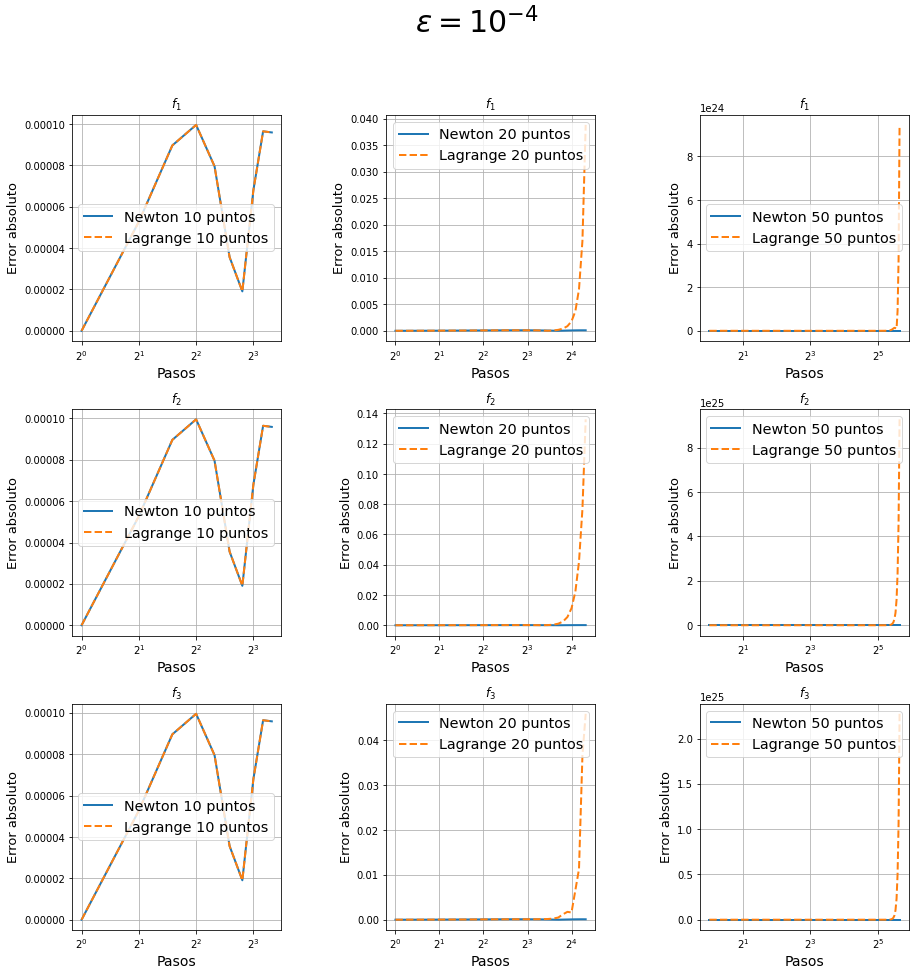

In [ ]:
# Hagamos la grafica.
fig, axs = plt.subplots(3,3,figsize = (15,15))
fig.subplots_adjust(wspace=0.5, hspace=0.3)

axs[0,0].plot(p_10, en_1_10_4, linewidth=2, label='Newton 10 puntos') # Interpolacion con 10 puntos.
axs[0,0].plot(p_10, e_1_10_4, linewidth=2, linestyle='dashed', label='Lagrange 10 puntos') # Interpolacion con 10 puntos.
axs[0,0].set_xscale('log', basex=2)
axs[0,0].set_xlabel('Pasos', fontsize=14)
axs[0,0].set_ylabel('Error absoluto',fontsize=13)
axs[0,0].legend(loc = 'best', fontsize = 'x-large')
axs[0,0].set_title('$f_1$')
axs[0,0].grid()

axs[0,1].plot(p_20, en_1_20_4, linewidth=2, label='Newton 20 puntos') # Interpolacion con 20 puntos.
axs[0,1].plot(p_20, e_1_20_4, linewidth=2, linestyle='dashed', label='Lagrange 20 puntos') # Interpolacion con 20 puntos.
axs[0,1].set_xscale('log', basex=2)
axs[0,1].set_xlabel('Pasos', fontsize=14)
axs[0,1].set_ylabel('Error absoluto',fontsize=13)
axs[0,1].legend(loc = 'upper left', fontsize = 'x-large')
axs[0,1].set_title('$f_1$')
axs[0,1].grid()

axs[0,2].plot(p_50, en_1_50_4, linewidth=2, label='Newton 50 puntos') # Interpolacion con 50 puntos
axs[0,2].plot(p_50, e_1_50_4, linewidth=2, linestyle='dashed', label='Lagrange 50 puntos') # Interpolacion con 50 puntos
axs[0,2].set_xscale('log', basex=2)
axs[0,2].set_xlabel('Pasos', fontsize=14)
axs[0,2].set_ylabel('Error absoluto',fontsize=13)
axs[0,2].legend(loc = 'best', fontsize = 'x-large')
axs[0,2].set_title('$f_1$')
axs[0,2].grid()

axs[1,0].plot(p_10, en_2_10_4, linewidth=2, label='Newton 10 puntos') # Interpolacion con 10 puntos.
axs[1,0].plot(p_10, e_2_10_4, linewidth=2, linestyle='dashed', label='Lagrange 10 puntos') # Interpolacion con 10 puntos.
axs[1,0].set_xscale('log', basex=2)
axs[1,0].set_xlabel('Pasos', fontsize=14)
axs[1,0].set_ylabel('Error absoluto',fontsize=13)
axs[1,0].legend(loc = 'best', fontsize = 'x-large')
axs[1,0].set_title('$f_2$')
axs[1,0].grid()

axs[1,1].plot(p_20, en_2_20_4, linewidth=2, label='Newton 20 puntos') # Interpolacion con 20 puntos.
axs[1,1].plot(p_20, e_2_20_4, linewidth=2, linestyle='dashed', label='Lagrange 20 puntos') # Interpolacion con 20 puntos.
axs[1,1].set_xscale('log', basex=2)
axs[1,1].set_xlabel('Pasos', fontsize=14)
axs[1,1].set_ylabel('Error absoluto',fontsize=13)
axs[1,1].legend(loc = 'upper left', fontsize = 'x-large')
axs[1,1].set_title('$f_2$')
axs[1,1].grid()

axs[1,2].plot(p_50, en_2_50_4, linewidth=2, label='Newton 50 puntos') # Interpolacion con 50 puntos
axs[1,2].plot(p_50, e_2_50_4, linewidth=2, linestyle='dashed', label='Lagrange 50 puntos') # Interpolacion con 50 puntos
axs[1,2].set_xscale('log', basex=2)
axs[1,2].set_xlabel('Pasos', fontsize=14)
axs[1,2].set_ylabel('Error absoluto',fontsize=13)
axs[1,2].legend(loc = 'best', fontsize = 'x-large')
axs[1,2].set_title('$f_2$')
axs[1,2].grid()

axs[2,0].plot(p_10, en_3_10_4, linewidth=2, label='Newton 10 puntos') # Interpolacion con 10 puntos.
axs[2,0].plot(p_10, e_3_10_4, linewidth=2, linestyle='dashed', label='Lagrange 10 puntos') # Interpolacion con 10 puntos.
axs[2,0].set_xscale('log', basex=2)
axs[2,0].set_xlabel('Pasos', fontsize=14)
axs[2,0].set_ylabel('Error absoluto',fontsize=13)
axs[2,0].legend(loc = 'best', fontsize = 'x-large')
axs[2,0].set_title('$f_3$')
axs[2,0].grid()

axs[2,1].plot(p_20, en_3_20_4, linewidth=2, label='Newton 20 puntos') # Interpolacion con 20 puntos.
axs[2,1].plot(p_20, e_3_20_4, linewidth=2, linestyle='dashed', label='Lagrange 20 puntos') # Interpolacion con 20 puntos.
axs[2,1].set_xscale('log', basex=2)
axs[2,1].set_xlabel('Pasos', fontsize=14)
axs[2,1].set_ylabel('Error absoluto',fontsize=13)
axs[2,1].legend(loc = 'upper left', fontsize = 'x-large')
axs[2,1].set_title('$f_3$')
axs[2,1].grid()

axs[2,2].plot(p_50, en_3_50_4, linewidth=2, label='Newton 50 puntos') # Interpolacion con 50 puntos
axs[2,2].plot(p_50, e_3_50_4, linewidth=2, linestyle='dashed', label='Lagrange 50 puntos') # Interpolacion con 50 puntos
axs[2,2].set_xscale('log', basex=2)
axs[2,2].set_xlabel('Pasos', fontsize=14)
axs[2,2].set_ylabel('Error absoluto',fontsize=13)
axs[2,2].legend(loc = 'best', fontsize = 'x-large')
axs[2,2].set_title('$f_3$')
axs[2,2].grid()

fig.suptitle('$\epsilon = 10^{-4}$', fontsize=30)
plt.show()

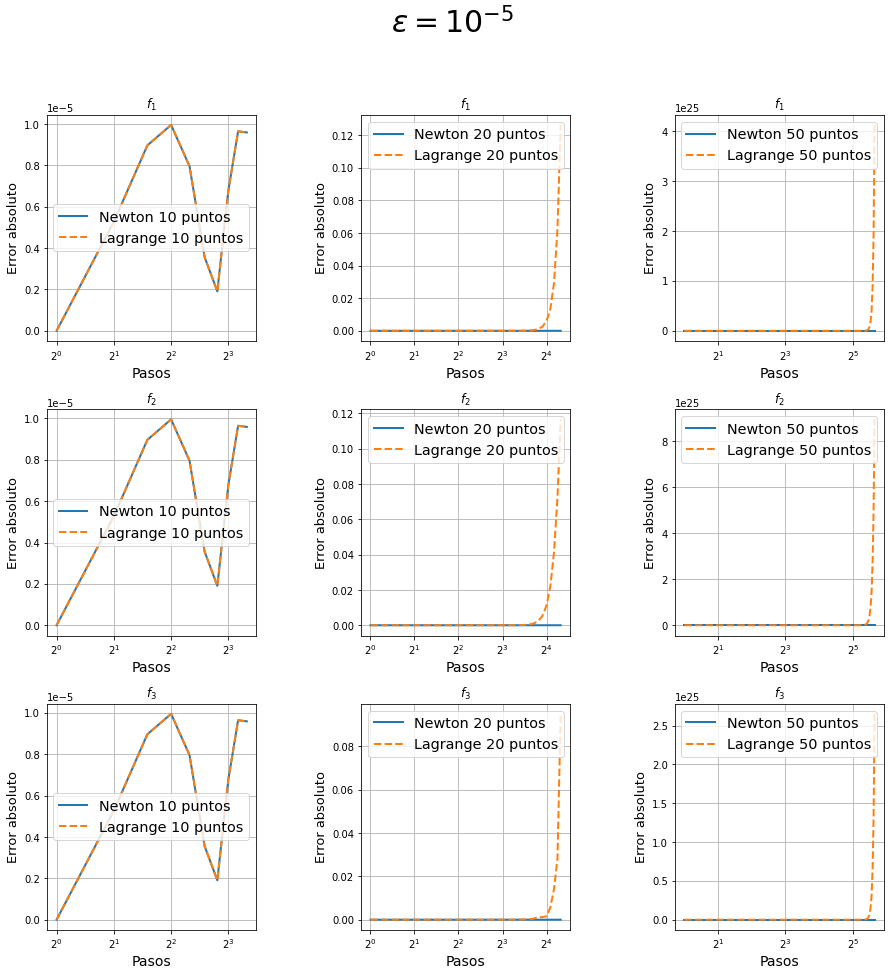

In [ ]:
# Hagamos la grafica.
fig, axs = plt.subplots(3,3,figsize = (15,15))
fig.subplots_adjust(wspace=0.5, hspace=0.3)

axs[0,0].plot(p_10, en_1_10_5, linewidth=2, label='Newton 10 puntos') # Interpolacion con 10 puntos.
axs[0,0].plot(p_10, e_1_10_5, linewidth=2, linestyle='dashed', label='Lagrange 10 puntos') # Interpolacion con 10 puntos.
axs[0,0].set_xscale('log', basex=2)
axs[0,0].set_xlabel('Pasos', fontsize=14)
axs[0,0].set_ylabel('Error absoluto',fontsize=13)
axs[0,0].legend(loc = 'best', fontsize = 'x-large')
axs[0,0].set_title('$f_1$')
axs[0,0].grid()

axs[0,1].plot(p_20, en_1_20_5, linewidth=2, label='Newton 20 puntos') # Interpolacion con 20 puntos.
axs[0,1].plot(p_20, e_1_20_5, linewidth=2, linestyle='dashed', label='Lagrange 20 puntos') # Interpolacion con 20 puntos.
axs[0,1].set_xscale('log', basex=2)
axs[0,1].set_xlabel('Pasos', fontsize=14)
axs[0,1].set_ylabel('Error absoluto',fontsize=13)
axs[0,1].legend(loc = 'upper left', fontsize = 'x-large')
axs[0,1].set_title('$f_1$')
axs[0,1].grid()

axs[0,2].plot(p_50, en_1_50_5, linewidth=2, label='Newton 50 puntos') # Interpolacion con 50 puntos
axs[0,2].plot(p_50, e_1_50_5, linewidth=2, linestyle='dashed', label='Lagrange 50 puntos') # Interpolacion con 50 puntos
axs[0,2].set_xscale('log', basex=2)
axs[0,2].set_xlabel('Pasos', fontsize=14)
axs[0,2].set_ylabel('Error absoluto',fontsize=13)
axs[0,2].legend(loc = 'best', fontsize = 'x-large')
axs[0,2].set_title('$f_1$')
axs[0,2].grid()

axs[1,0].plot(p_10, en_2_10_5, linewidth=2, label='Newton 10 puntos') # Interpolacion con 10 puntos.
axs[1,0].plot(p_10, e_2_10_5, linewidth=2, linestyle='dashed', label='Lagrange 10 puntos') # Interpolacion con 10 puntos.
axs[1,0].set_xscale('log', basex=2)
axs[1,0].set_xlabel('Pasos', fontsize=14)
axs[1,0].set_ylabel('Error absoluto',fontsize=13)
axs[1,0].legend(loc = 'best', fontsize = 'x-large')
axs[1,0].set_title('$f_2$')
axs[1,0].grid()

axs[1,1].plot(p_20, en_2_20_5, linewidth=2, label='Newton 20 puntos') # Interpolacion con 20 puntos.
axs[1,1].plot(p_20, e_2_20_5, linewidth=2, linestyle='dashed', label='Lagrange 20 puntos') # Interpolacion con 20 puntos.
axs[1,1].set_xscale('log', basex=2)
axs[1,1].set_xlabel('Pasos', fontsize=14)
axs[1,1].set_ylabel('Error absoluto',fontsize=13)
axs[1,1].legend(loc = 'upper left', fontsize = 'x-large')
axs[1,1].set_title('$f_2$')
axs[1,1].grid()

axs[1,2].plot(p_50, en_2_50_5, linewidth=2, label='Newton 50 puntos') # Interpolacion con 50 puntos
axs[1,2].plot(p_50, e_2_50_5, linewidth=2, linestyle='dashed', label='Lagrange 50 puntos') # Interpolacion con 50 puntos
axs[1,2].set_xscale('log', basex=2)
axs[1,2].set_xlabel('Pasos', fontsize=14)
axs[1,2].set_ylabel('Error absoluto',fontsize=13)
axs[1,2].legend(loc = 'best', fontsize = 'x-large')
axs[1,2].set_title('$f_2$')
axs[1,2].grid()

axs[2,0].plot(p_10, en_3_10_5, linewidth=2, label='Newton 10 puntos') # Interpolacion con 10 puntos.
axs[2,0].plot(p_10, e_3_10_5, linewidth=2, linestyle='dashed', label='Lagrange 10 puntos') # Interpolacion con 10 puntos.
axs[2,0].set_xscale('log', basex=2)
axs[2,0].set_xlabel('Pasos', fontsize=14)
axs[2,0].set_ylabel('Error absoluto',fontsize=13)
axs[2,0].legend(loc = 'best', fontsize = 'x-large')
axs[2,0].set_title('$f_3$')
axs[2,0].grid()

axs[2,1].plot(p_20, en_3_20_5, linewidth=2, label='Newton 20 puntos') # Interpolacion con 20 puntos.
axs[2,1].plot(p_20, e_3_20_5, linewidth=2, linestyle='dashed', label='Lagrange 20 puntos') # Interpolacion con 20 puntos.
axs[2,1].set_xscale('log', basex=2)
axs[2,1].set_xlabel('Pasos', fontsize=14)
axs[2,1].set_ylabel('Error absoluto',fontsize=13)
axs[2,1].legend(loc = 'upper left', fontsize = 'x-large')
axs[2,1].set_title('$f_3$')
axs[2,1].grid()

axs[2,2].plot(p_50, en_3_50_5, linewidth=2, label='Newton 50 puntos') # Interpolacion con 50 puntos
axs[2,2].plot(p_50, e_3_50_5, linewidth=2, linestyle='dashed', label='Lagrange 50 puntos') # Interpolacion con 50 puntos
axs[2,2].set_xscale('log', basex=2)
axs[2,2].set_xlabel('Pasos', fontsize=14)
axs[2,2].set_ylabel('Error absoluto',fontsize=13)
axs[2,2].legend(loc = 'best', fontsize = 'x-large')
axs[2,2].set_title('$f_3$')
axs[2,2].grid()

fig.suptitle('$\epsilon = 10^{-5}$', fontsize=30)
plt.show()

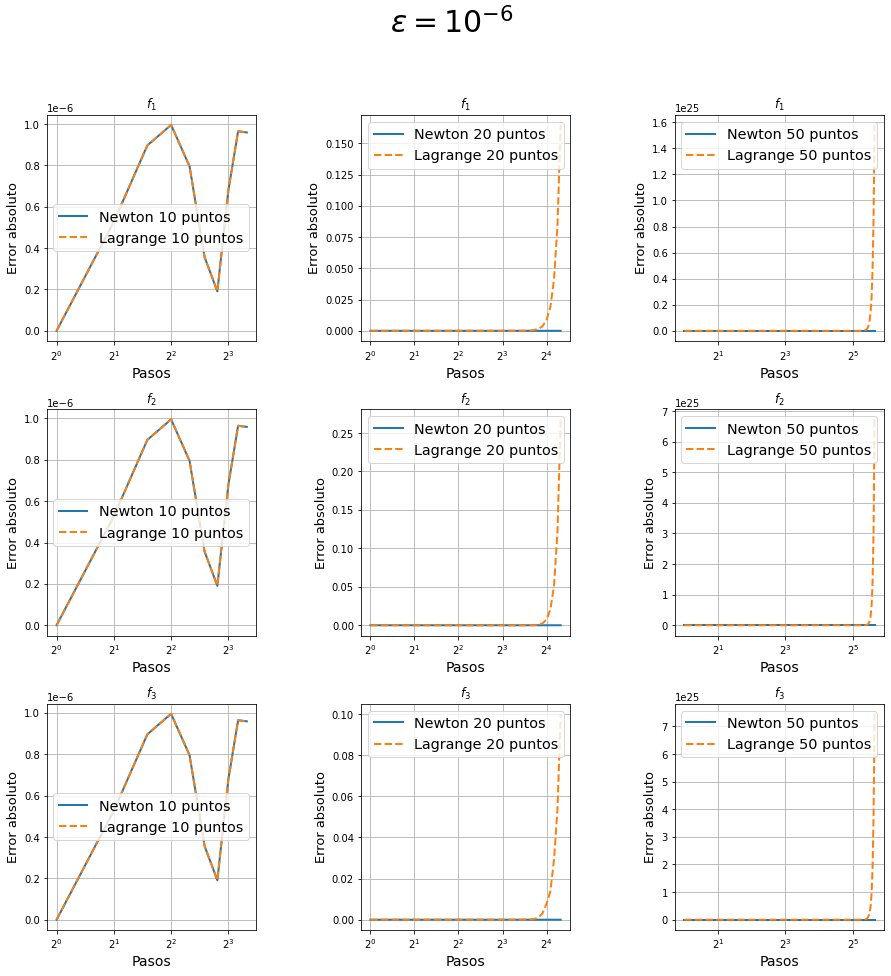

In [ ]:
# Hagamos la grafica.
fig, axs = plt.subplots(3,3,figsize = (15,15))
fig.subplots_adjust(wspace=0.5, hspace=0.3)

axs[0,0].plot(p_10, en_1_10_6, linewidth=2, label='Newton 10 puntos') # Interpolacion con 10 puntos.
axs[0,0].plot(p_10, e_1_10_6, linewidth=2, linestyle='dashed', label='Lagrange 10 puntos') # Interpolacion con 10 puntos.
axs[0,0].set_xscale('log', basex=2)
axs[0,0].set_xlabel('Pasos', fontsize=14)
axs[0,0].set_ylabel('Error absoluto',fontsize=13)
axs[0,0].legend(loc = 'best', fontsize = 'x-large')
axs[0,0].set_title('$f_1$')
axs[0,0].grid()

axs[0,1].plot(p_20, en_1_20_6, linewidth=2, label='Newton 20 puntos') # Interpolacion con 20 puntos.
axs[0,1].plot(p_20, e_1_20_6, linewidth=2, linestyle='dashed', label='Lagrange 20 puntos') # Interpolacion con 20 puntos.
axs[0,1].set_xscale('log', basex=2)
axs[0,1].set_xlabel('Pasos', fontsize=14)
axs[0,1].set_ylabel('Error absoluto',fontsize=13)
axs[0,1].legend(loc = 'upper left', fontsize = 'x-large')
axs[0,1].set_title('$f_1$')
axs[0,1].grid()

axs[0,2].plot(p_50, en_1_50_6, linewidth=2, label='Newton 50 puntos') # Interpolacion con 50 puntos
axs[0,2].plot(p_50, e_1_50_6, linewidth=2, linestyle='dashed', label='Lagrange 50 puntos') # Interpolacion con 50 puntos
axs[0,2].set_xscale('log', basex=2)
axs[0,2].set_xlabel('Pasos', fontsize=14)
axs[0,2].set_ylabel('Error absoluto',fontsize=13)
axs[0,2].legend(loc = 'best', fontsize = 'x-large')
axs[0,2].set_title('$f_1$')
axs[0,2].grid()

axs[1,0].plot(p_10, en_2_10_6, linewidth=2, label='Newton 10 puntos') # Interpolacion con 10 puntos.
axs[1,0].plot(p_10, e_2_10_6, linewidth=2, linestyle='dashed', label='Lagrange 10 puntos') # Interpolacion con 10 puntos.
axs[1,0].set_xscale('log', basex=2)
axs[1,0].set_xlabel('Pasos', fontsize=14)
axs[1,0].set_ylabel('Error absoluto',fontsize=13)
axs[1,0].legend(loc = 'best', fontsize = 'x-large')
axs[1,0].set_title('$f_2$')
axs[1,0].grid()

axs[1,1].plot(p_20, en_2_20_6, linewidth=2, label='Newton 20 puntos') # Interpolacion con 20 puntos.
axs[1,1].plot(p_20, e_2_20_6, linewidth=2, linestyle='dashed', label='Lagrange 20 puntos') # Interpolacion con 20 puntos.
axs[1,1].set_xscale('log', basex=2)
axs[1,1].set_xlabel('Pasos', fontsize=14)
axs[1,1].set_ylabel('Error absoluto',fontsize=13)
axs[1,1].legend(loc = 'upper left', fontsize = 'x-large')
axs[1,1].set_title('$f_2$')
axs[1,1].grid()

axs[1,2].plot(p_50, en_2_50_6, linewidth=2, label='Newton 50 puntos') # Interpolacion con 50 puntos
axs[1,2].plot(p_50, e_2_50_6, linewidth=2, linestyle='dashed', label='Lagrange 50 puntos') # Interpolacion con 50 puntos
axs[1,2].set_xscale('log', basex=2)
axs[1,2].set_xlabel('Pasos', fontsize=14)
axs[1,2].set_ylabel('Error absoluto',fontsize=13)
axs[1,2].legend(loc = 'best', fontsize = 'x-large')
axs[1,2].set_title('$f_2$')
axs[1,2].grid()

axs[2,0].plot(p_10, en_3_10_6, linewidth=2, label='Newton 10 puntos') # Interpolacion con 10 puntos.
axs[2,0].plot(p_10, e_3_10_6, linewidth=2, linestyle='dashed', label='Lagrange 10 puntos') # Interpolacion con 10 puntos.
axs[2,0].set_xscale('log', basex=2)
axs[2,0].set_xlabel('Pasos', fontsize=14)
axs[2,0].set_ylabel('Error absoluto',fontsize=13)
axs[2,0].legend(loc = 'best', fontsize = 'x-large')
axs[2,0].set_title('$f_3$')
axs[2,0].grid()

axs[2,1].plot(p_20, en_3_20_6, linewidth=2, label='Newton 20 puntos') # Interpolacion con 20 puntos.
axs[2,1].plot(p_20, e_3_20_6, linewidth=2, linestyle='dashed', label='Lagrange 20 puntos') # Interpolacion con 20 puntos.
axs[2,1].set_xscale('log', basex=2)
axs[2,1].set_xlabel('Pasos', fontsize=14)
axs[2,1].set_ylabel('Error absoluto',fontsize=13)
axs[2,1].legend(loc = 'upper left', fontsize = 'x-large')
axs[2,1].set_title('$f_3$')
axs[2,1].grid()

axs[2,2].plot(p_50, en_3_50_6, linewidth=2, label='Newton 50 puntos') # Interpolacion con 50 puntos
axs[2,2].plot(p_50, e_3_50_6, linewidth=2, linestyle='dashed', label='Lagrange 50 puntos') # Interpolacion con 50 puntos
axs[2,2].set_xscale('log', basex=2)
axs[2,2].set_xlabel('Pasos', fontsize=14)
axs[2,2].set_ylabel('Error absoluto',fontsize=13)
axs[2,2].legend(loc = 'best', fontsize = 'x-large')
axs[2,2].set_title('$f_3$')
axs[2,2].grid()

fig.suptitle('$\epsilon = 10^{-6}$', fontsize=30)
plt.show()